---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
---


# Kriging (Gaussian Process Regression)

<!-- bart21mSlides2022Lec-05 -->

## DACE and RSM

Mathematical models implemented in computer codes are used to circumvent the need for expensive field data collection. These models are particularly useful when dealing with highly nonlinear response surfaces, high signal-to-noise ratios (which often involve deterministic evaluations), and a global scope. As a result, a new approach is required in comparison to Response Surface Methodology (RSM), which was discussed in @sec-rsm-intro.

With the improvement in computing power and simulation fidelity, researchers gain higher confidence and a better understanding of the dynamics in physical, biological, and social systems. However, the expansion of configuration spaces and increasing input dimensions necessitates more extensive designs. High-performance computing (HPC) allows for thousands of runs, whereas previously only tens were possible. This shift towards larger models and training data presents new computational challenges.

Research questions for DACE (Design and Analysis of Computer Experiments) include how to design computer experiments that make efficient use of computation and how to meta-model computer codes to save on simulation effort. The choice of surrogate model for computer codes significantly impacts the optimal experiment design, and the preferred model-design pairs can vary depending on the specific goal.

The combination of computer simulation, design, and modeling with field data from similar real-world experiments introduces a new category of computer model tuning problems. The ultimate goal is to automate these processes to the greatest extent possible, allowing for the deployment of HPC with minimal human intervention.

One of the remaining differences between RSM and DACE lies in how they handle noise. DACE employs replication, a technique that would not be used in a deterministic setting, to separate signal from noise. Traditional RSM is best suited for situations where a substantial proportion of the variability in the data is due to noise, and where the acquisition of data values can be severely limited. Consequently, RSM is better suited for a different class of problems, aligning with its intended purposes.

Two very good texts on computer experiments and surrogate modeling are @Sant03a and @Forr08a. The former is the canonical reference in the statistics literature and the latter is perhaps more popular in engineering.

::: {#exm-dace-rsm}
### Example: DACE and RSM
Imagine you are a chemical engineer tasked with optimizing a chemical process to maximize yield. You can control temperature and pressure, but repeated experiments show variability in yield due to inconsistencies in raw materials.

* Using RSM: You would use RSM to design a series of experiments varying temperature and pressure. You would then fit a response surface (a mathematical model) to the data, helping you understand how changes in temperature and pressure affect yield. Using this model, you can identify optimal conditions for maximizing yield despite the noise.

* Using DACE: If instead you use a computational model to simulate the chemical process and want to account for numerical noise or uncertainty in model parameters, you might use DACE. You would run simulations at different conditions, possibly repeating them to assess variability and build a surrogate model that accurately predicts yields, which can be optimized to find the best conditions.

:::


### Noise Handling in RSM and DACE

Noise in RSM: In experimental settings, noise often arises due to variability in experimental conditions, measurement errors, or other uncontrollable factors. This noise can significantly affect the response variable, $Y$. Replication is a standard procedure for handling noise in RSM.
In the context of computer experiments, noise might not be present in the traditional sense since simulations can be deterministic. However, variability can arise from uncertainty in input parameters or model inaccuracies. DACE predominantly utilizes advanced interpolation to construct accurate models of deterministic data, sometimes considering statistical noise modeling if needed.

## Background: Expectation, Mean, Standard Deviation


The distribution of a random vector is characterized by some indexes. These are the expectation, the mean, and the standard deviation. The expectation is a measure of the central tendency of a random variable, while the standard deviation quantifies the spread of the distribution. These indexes are essential for understanding the behavior of random variables and making predictions based on them.


::: {#def-random-variable}
### Random Variable
A random variable $X$ is a mapping from the sample space of a random experiment to the real numbers. It assigns a numerical value to each outcome of the experiment. Random variables can be either:

* Discrete: If $X$ takes on a countable number of distinct values.
* Continuous: If $X$ takes on an uncountable number of values.

Mathematically, a random variable is a function $X: \Omega \rightarrow \mathbb{R}$, where $\Omega$ is the sample space.
:::

::: {#def-probability-distribution}
### Probability Distribution

A probability distribution describes how the values of a random variable are distributed.
It is characterized for a discrete random variable $X$ by the probability mass function (PMF) $p_X(x)$ and for a continuous random variable $X$ by the probability density function (PDF) $f_X(x)$.

:::


::: {#def-probability-mass-function}
### Probability Mass Function (PMF)

$p_X(x) = P(X = x)$ gives the probability that $X$ takes the value $x$.

:::

::: {#def-probability-density-function}
### Probability Density Function (PDF):

$f_X(x)$ is a function such that for any interval $[a, b]$, the probability that $X$ falls within this interval is given by the integral $\int_a^b f_X(x) \mathrm{d}x$.

:::

The distribution function must satisfy:
$$
\sum_{x \in D_X} p_X(x) = 1
$$
for discrete random variables, where $D_X$ is the domain of $X$ and
$$
\int_{-\infty}^{\infty} f_X(x) \mathrm{d}x = 1
$$
for continuous random variables.


With these definitions in place, we can now introduce the definition of the expectation, which is a fundamental measure of the central tendency of a random variable.

::: {#def-expectation}
### Expectation
The expectation or expected value of a random variable $X$, denoted $E[X]$, is defined as follows:

For a discrete random variable $X$:
$$
E[X] = \sum_{x \in D_X} x p_X(x) \quad \text{if $X$ is discrete}.
$$

For a continuous random variable $X$:
$$
E[X] = \int_{x \in D_X} x f_X(x) \mathrm{d}x \quad \text{if $X$ is continuous.}
$$
:::


The mean, $\mu$, of a probability distribution is a measure of its central tendency or location. That is, $E(X)$ is defined as the average of all possible values of $X$, weighted by their probabilities.


::: {#exm-expectation}
### Expectation

Let $X$ denote the number produced by rolling a fair die.
Then
$$
E(X) = 1 \times 1/6 + 2 \times 1/6 + 3 \times 1/6 + 4 \times 1/6 + 5 \times 1/6 + 6\times 1/6 = 3.5.
$$
:::


::: {#def-sample-mean}
### Sample Mean

The sample mean is an important estimate of the population mean. The sample mean of a sample $\{x_i\}$ ($i=1,2,\ldots,n$) is defined as 
$$
\overline{x}  = \frac{1}{n} \sum_i x_i.
$$

:::


While both the expectation of a random variable and the sample mean provide measures of central tendency, they differ in their context, calculation, and interpretation.

* The expectation is a theoretical measure that characterizes the average value of a random variable over an infinite number of repetitions of an experiment. 
The expectation is calculated using a probability distribution and provides a parameter of the entire population or distribution. It reflects the long-term average or central value of the outcomes generated by the random process.
* The sample mean is a statistic. It provides an estimate of the population mean based on a finite sample of data.
It is computed directly from the data sample, and its value can vary between different samples from the same population.
It serves as an approximation or estimate of the population mean.
It is used in statistical inference to make conclusions about the population mean based on sample data.

If we are trying to predict the value of a random variable $X$ by its mean $\mu = E(X)$, the error will be $X-\mu$. In many situations it is useful to have an idea how large this deviation or error is.  Since $E(X-\mu) = E(X) -\mu = 0$, it is necessary to use the absolute value or the square of ($X-\mu$).  The squared error is the first choice, because the derivatives are easier to calculate.  These considerations motivate the definition of the variance:

::: {#def-variance}
### Variance

The variance of a random variable $X$ is the mean squared deviation of $X$ from its expected value $\mu = E(X)$.
\begin{equation}
Var(X) = E[ (X-\mu)^2].
\end{equation}
::: 

The variance is a measure of the spread of a distribution. It quantifies how much the values of a random variable differ from the mean. A high variance indicates that the values are spread out over a wide range, while a low variance indicates that the values are clustered closely around the mean.

::: {#def-standard-deviation}
### Standard Deviation

Taking the square root of the variance to get back to the same scale of units as $X$ gives the standard deviation. The standard deviation of $X$ is the square root of the variance of $X$.
\begin{equation}
sd(X) = \sqrt{Var(X)}.
\end{equation}

:::

### Calculation of the Standard Deviation with Python

The function `numpy.std` returns the standard deviation,
a measure of the spread of a distribution, of the array elements.
The argument `ddof` specifies the Delta Degrees of Freedom.
The divisor used in calculations is `N - ddof`, where `N` represents the number of elements. 
By default `ddof` is zero, i.e., `std` uses the formula 
$$
\sqrt{  \frac{1}{N} \sum_i \left( x_i - \bar{x} \right)^2  } \qquad \text{with } \quad \bar{x} = \sum_{i=1}^N x_i /N.
$$

::: {#exm-std-python}
#### Standard Deviation with Python

Consider the array $[1,2,3]$:
Since $\bar{x} = 2$, the following value is computed: $$ \sqrt{1/3 \times \left( (1-2)^2 + (2-2)^2 + (3-2)^2  \right)} = \sqrt{2/3}.$$


In [1]:
import numpy as np
a = np.array([[1, 2, 3]])
np.std(a)

0.816496580927726

:::


The empirical standard deviation (which uses $N-1$),  $\sqrt{1/2 \times \left( (1-2)^2 + (2-2)^2 + (3-2)^2  \right)} = \sqrt{2/2}$,
can be calculated in Python as follows:


In [2]:
np.std(a, ddof=1)

1.0

### The Argument "axis" 
When you compute `np.std` with `axis=0`,
it calculates the standard deviation along the vertical axis, meaning it computes the standard deviation for each column of the array.
On the other hand, when you compute `np.std` with `axis=1`,
it calculates the standard deviation along the horizontal axis, meaning it computes the standard deviation for each row of the array.
If the axis parameter is not specified, `np.std` computes the standard deviation of the flattened array,
i.e., it calculates the standard deviation of all the elements in the array.

::: {#exm-std-axis}
### Axes along which the standard deviation is computed


In [3]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

First, we calculate the standard deviation of all elements in the array:


In [4]:
np.std(A)

1.118033988749895

Setting `axis=0` calculates the standard deviation along the vertical axis (column-wise):


In [5]:
np.std(A, axis=0)

array([1., 1.])

Finally, setting `axis=1` calculates the standard deviation along the horizontal axis (row-wise):


In [6]:
np.std(A, axis=1)

array([0.5, 0.5])

:::

## Data Types and Precision in Python

The float16 data type in numpy represents a half-precision floating point number. It uses 16 bits of memory, which gives it a precision of about 3 decimal digits.

The float32 data type in numpy represents a single-precision floating point number. It uses 32 bits of memory, which gives it a precision of about 7 decimal digits.
On the other hand, float64 represents a double-precision floating point number. It uses 64 bits of memory, which gives it a precision of about 15 decimal digits.

The reason float16 and float32 show fewer digits is because it has less precision due to using less memory.
The bits of memory are used to store the sign, exponent, and fraction parts of the floating point number, and with fewer bits, you can represent fewer digits accurately.

::: {#exm-float}
#### 16 versus 32 versus 64 bit


In [7]:
import numpy as np

# Define a number
num = 0.123456789123456789

num_float16 = np.float16(num)
num_float32 = np.float32(num)
num_float64 = np.float64(num)

print("float16: ", num_float16) 
print("float32: ", num_float32)
print("float64: ", num_float64)

float16:  0.1235
float32:  0.12345679
float64:  0.12345678912345678


:::


## Distributions and Random Numbers in Python

Results from computers are deterministic, so it sounds like a contradiction in terms to generate random numbers on a computer.
Standard computers generate pseudo-randomnumbers, i.e., numbers that behave as if they were drawn randomly.

::: {.callout-note}
### Deterministic Random Numbers

* Idea: Generate deterministically numbers that **look** (behave) as if they were drawn randomly.

:::

### The Uniform Distribution

::: {#def-uniform-distribution}
### The Uniform Distribution

The probability density function of the uniform distribution is defined as:
$$
f_X(x) = \frac{1}{b-a} \qquad \text{for $x \in [a,b]$}.
$$

:::

Generate 10 random numbers from a uniform distribution between $a=0$ and $b=1$:


In [8]:
import numpy as np
# Initialize the random number generator
rng = np.random.default_rng(seed=123456789)
n = 10
x = rng.uniform(low=0.0, high=1.0, size=n)
x

array([0.02771274, 0.90670006, 0.88139355, 0.62489728, 0.79071481,
       0.82590801, 0.84170584, 0.47172795, 0.95722878, 0.94659153])

Generate 10,000 random numbers from a uniform distribution between 0 and 10 and plot a histogram of the numbers:


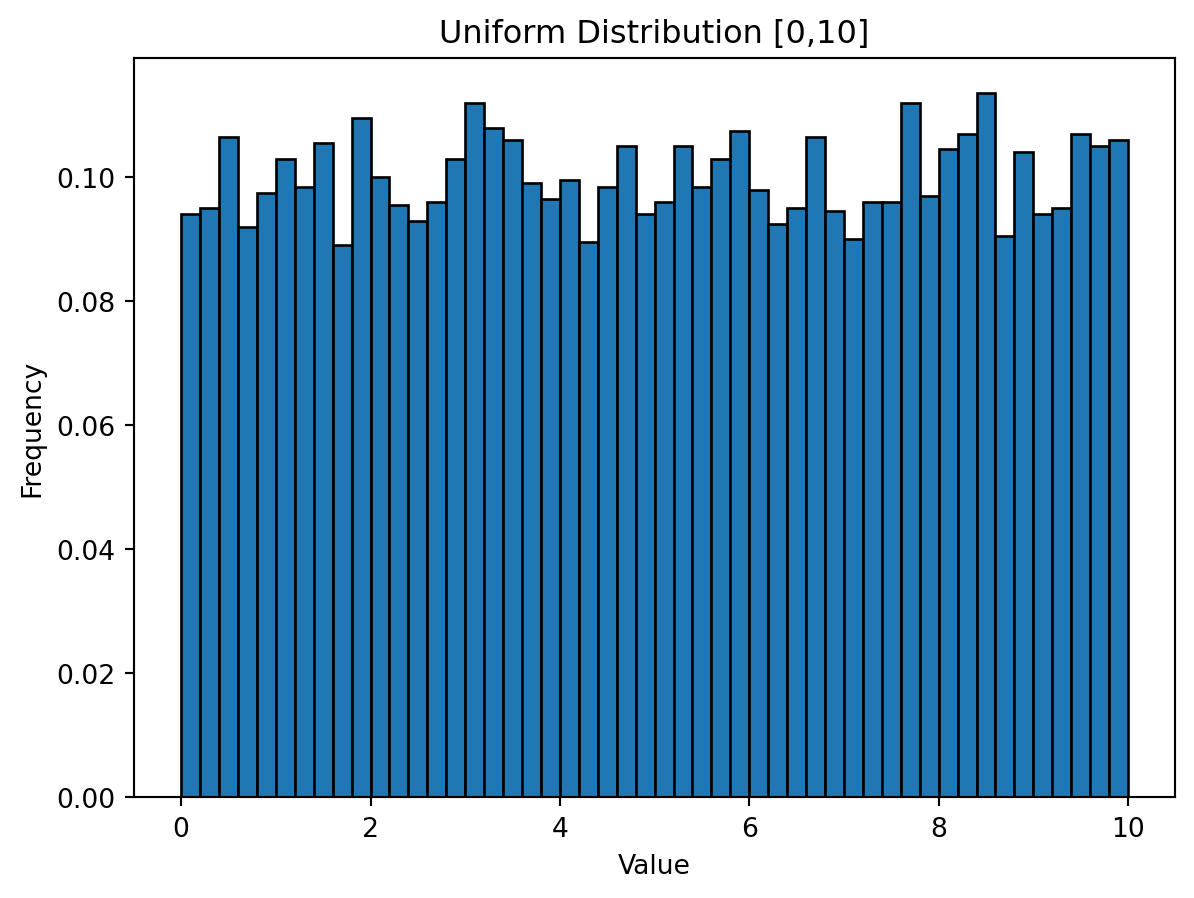

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the random number generator
rng = np.random.default_rng(seed=123456789)

# Generate random numbers from a uniform distribution
x = rng.uniform(low=0, high=10, size=10000)

# Plot a histogram of the numbers
plt.hist(x, bins=50, density=True, edgecolor='black')
plt.title('Uniform Distribution [0,10]')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### The Normal Distribution

A normally distributed random variable is a random variable whose associated probability distribution is the normal (or Gaussian) distribution. The normal distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve.

The distribution is defined by two parameters: the mean $\mu$  and the standard deviation $\sigma$. The mean indicates the center of the distribution, while the standard deviation measures the spread or dispersion of the distribution.

This distribution is widely used in statistics and the natural and social sciences as a simple model for random variables with unknown distributions.


::: {#def-normal-distribution}
### The Normal Distribution

The probability density function of the normal distribution is defined as:
$$
f_X(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2\right),
$$  {#eq-normal-one}
where:
$\mu$ is the mean;
$\sigma$ is the standard deviation.

:::

To generate ten random numbers from a normal distribution, the following command can be used.


In [10]:
#| label: gen-normal-10
import numpy as np
rng = np.random.default_rng()
n = 10
mu, sigma = 2, 0.1
x = rng.normal(mu, sigma, n)
x

array([2.00513569, 1.94885274, 2.03433539, 1.99925545, 2.06275649,
       1.89145378, 1.93780987, 1.96353023, 1.99932373, 2.0859012 ])

Verify the mean:


In [11]:
abs(mu - np.mean(x))

0.007164542627120074

Note: To verify the standard deviation, we use `ddof = 1` (empirical standard deviation):


In [12]:
abs(sigma - np.std(x, ddof=1))

0.04073939490998822

In [13]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_normal_data(mu, sigma, num_samples):
    return mu + sigma * np.random.randn(num_samples)

def plot_normal_distribution(mu, sigma, num_samples):
    # Generate normally distributed data
    data = generate_normal_data(mu, sigma, num_samples)
    
    # Plot histogram
    count, bins, ignored = plt.hist(data, 30, density=True)
    
    # Plot normal distribution curve
    plt.plot(bins, norm.pdf(bins, mu, sigma), linewidth=2, color='r')
    plt.show()

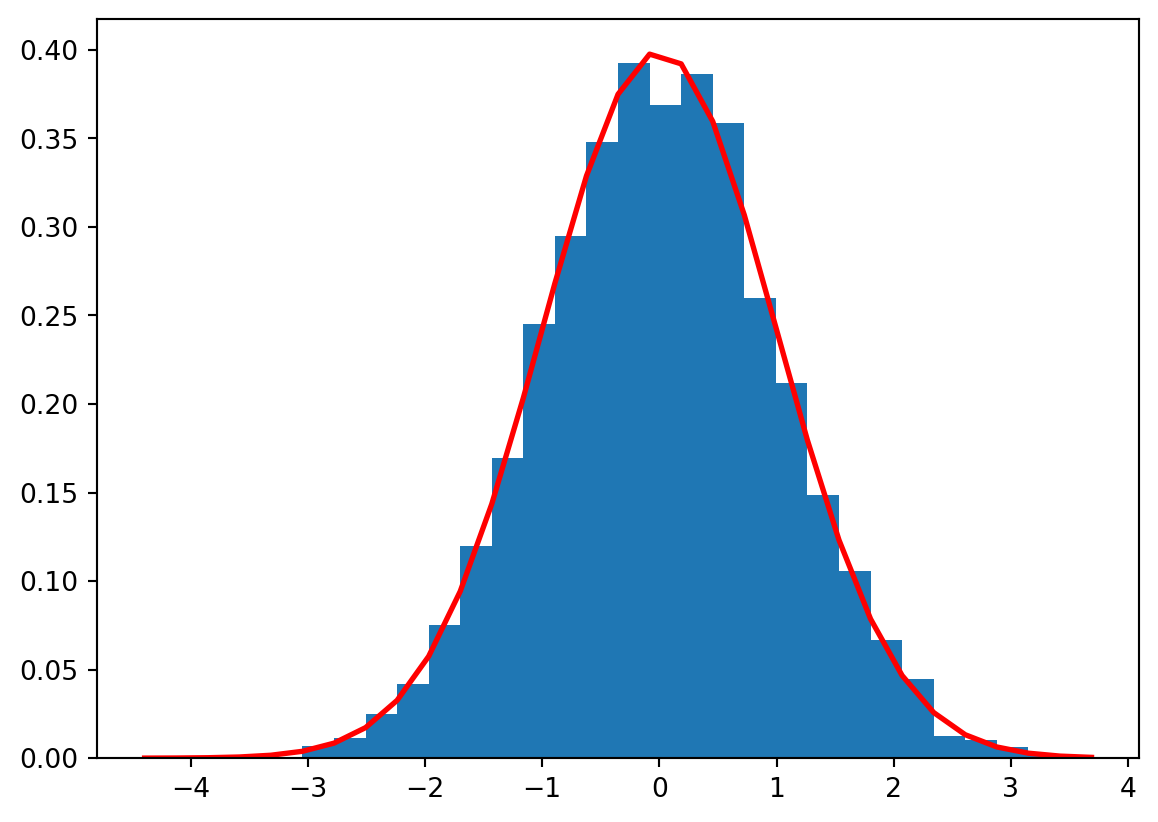

In [14]:
plot_normal_distribution(mu=0, sigma=1, num_samples=10000)

### Visualization of the Standard Deviation

The standard deviation of normal distributed can be visualized in terms of the histogram of $X$:

* about 68\% of the values will lie in the interval within one standard deviation of the mean
* 95% lie within two standard deviation of the mean
* and 99.9% lie within 3 standard deviations of the mean. 


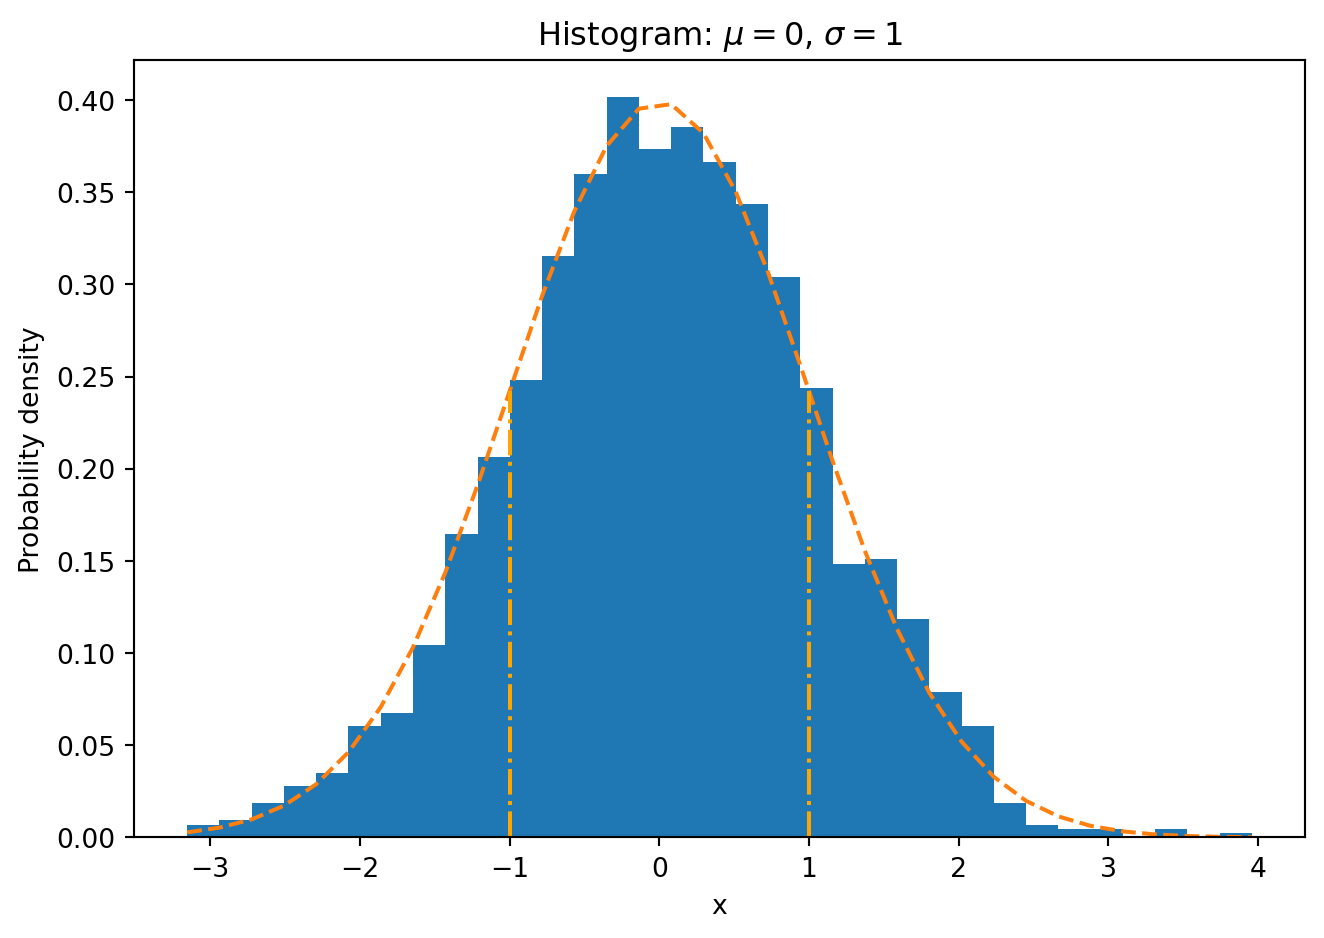

In [15]:
#| echo: false
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# example data
mu = 0.0  # mean of distribution
sigma = 1  # standard deviation of distribution
x = mu + sigma * np.random.randn(2000)
num_bins = 33
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=0$, $\sigma=1$')
ax.vlines(-1, ymin=0, ymax = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (-1.0 - mu))**2)), colors="orange", linestyles="-.")
ax.vlines(1, ymin=0, ymax = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (1.0 - mu))**2)), colors="orange", linestyles="-.")
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### Standardization of Random Variables

To compare statistical properties of random variables which use different units, it is a common practice to transform these random variables into standardized variables. 

::: {#def-standard-units}
### Standard Units
If a random variable $X$ has expectation $E(X) = \mu$ and standard deviation $sd(X) = \sigma >0$, the random variable 
$$
X^{\ast} = (X-\mu)/\sigma
$$ 
is called $X$ in standard units. 
It has $E(X^{\ast}) = 0$ and $sd(X^{\ast}) =1$.
:::


### Realizations of a Normal Distribution

Realizations of a normal distribution refers to the actual values that you get when you draw samples from a normal distribution.
Each sample drawn from the distribution is a realization of that distribution.

::: {exm-realizations}
### Realizations of a Normal Distribution
If you have a normal distribution with a mean of 0 and a standard deviation of 1,
each number you draw from that distribution is a realization.
Here is a Python example that generates 10 realizations of a normal distribution with a mean of 0 and a standard deviation of 1:


In [16]:
import numpy as np
mu = 0
sigma = 1
realizations = np.random.normal(mu, sigma, 10)
print(realizations)

[ 0.48951662  0.23879586 -0.44811181 -0.610795   -2.02994507  0.60794659
 -0.35410888  0.15258149  0.50127485 -0.78640277]


In this code, `np.random.normal` generates ten realizations of a normal distribution with a mean of 0 and a standard deviation of 1.
The realizations array contains the actual values drawn from the distribution.
:::


### The Multivariate Normal Distribution

The multivariate normal, multinormal, or Gaussian distribution serves as a generalization of the one-dimensional normal distribution to higher dimensions.
We will consider $k$-dimensional random vectors $X = (X_1, X_2, \ldots, X_k)$. When drawing samples from this distribution, it results in a set of values represented as $\{x_1, x_2, \ldots, x_k\}$.
To fully define this distribution, it is necessary to specify its mean $\mu$ and covariance matrix $\Sigma$. These parameters are analogous to the mean, which represents the central location, and the variance (squared standard deviation) of the one-dimensional normal distribution introduced in @eq-normal-one.

::: {#def-multivariate-normal}
### The Multivariate Normal Distribution

The probability density function (PDF) of the multivariate normal distribution is defined as:
$$
f_X(x) = \frac{1}{\sqrt{(2\pi)^n \det(\Sigma)}} \exp\left(-\frac{1}{2} (x-\mu)^T\Sigma^{-1} (x-\mu)\right),
$$
where:
$\mu$ is the $k \times 1$  mean vector;
$\Sigma$ is the  $k \times k$ covariance matrix.
The covariance matrix  $\Sigma$ is assumed to be positive definite, so that its determinant is strictly positive.

:::


In the context of the multivariate normal distribution, the mean takes the form of a coordinate within an $k$-dimensional space. This coordinate represents the location where samples are most likely to be generated, akin to the peak of the bell curve in a one-dimensional or univariate normal distribution.

::: {#def-covariance-2}
### Covariance of two random variables

For two random variables
$X$
and 
$Y$,
the covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values:
$$
\operatorname{cov}(X, Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}
$$

For discrete random variables, covariance can be written as:
$$
\operatorname{cov} (X,Y) = \frac{1}{n}\sum_{i=1}^n (x_i-E(X)) (y_i-E(Y)).
$$
:::


The covariance within the multivariate normal distribution denotes the extent to which two variables vary together. 
The elements of the covariance matrix, such as $\Sigma_{ij}$, represent the covariances between the variables $x_i$ and $x_j$. These covariances describe how the different variables in the distribution are related to each other in terms of their variability.

::: {#exm-bivariate-normal-cov-pos}

### The Bivariate Normal Distribution with Positive Covariances
@fig-bi9040 shows draws from a bivariate normal distribution with $\mu = \begin{pmatrix}0 \\ 0\end{pmatrix}$ and 
$\Sigma=\begin{pmatrix} 9 & 4 \\ 4 & 9 \end{pmatrix}$.


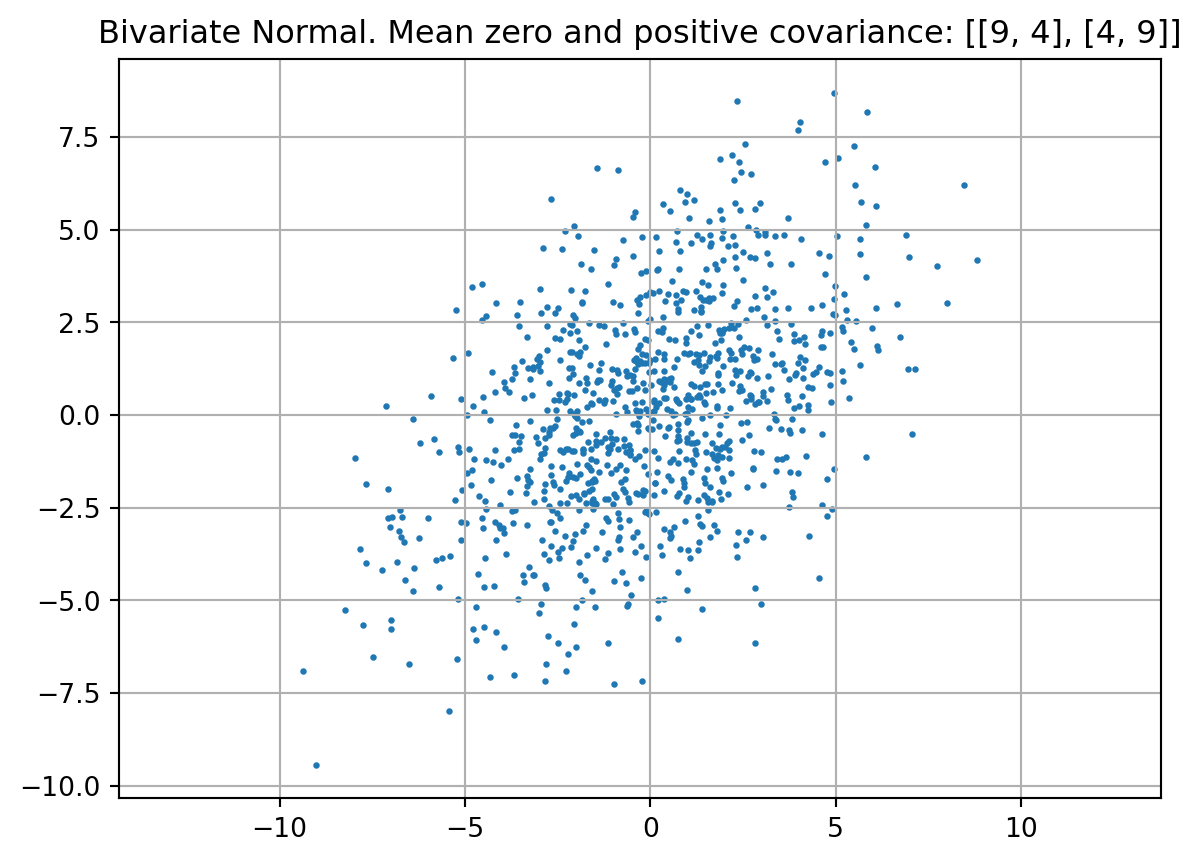

In [17]:
#| label: fig-bi9040
#| fig-cap: Bivariate Normal. Mean zero and covariance $\Sigma=\begin{pmatrix} 9 & 4 \\ 4 & 9\end{pmatrix}$
#| echo: false
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[9, 4], [4, 9]]  # diagonal covariance
x, y = rng.multivariate_normal(mean, cov, 1000).T
# Create a scatter plot of the numbers
plt.scatter(x, y, s=2)
plt.axis('equal')
plt.grid()
plt.title(f"Bivariate Normal. Mean zero and positive covariance: {cov}")
plt.show()

::: 

The covariance matrix of a bivariate normal distribution determines the shape,
orientation, and spread of the distribution in the two-dimensional space.

The diagonal elements of the covariance matrix ($\sigma_1^2$, $\sigma_2^2$) are the variances of the individual variables.
They determine the spread of the distribution along each axis. A larger variance corresponds to a greater spread along that axis.

The off-diagonal elements of the covariance matrix ($\sigma_{12}, \sigma_{21}$) are the covariances between the variables.
They determine the orientation and shape of the distribution.
If the covariance is positive, the distribution is stretched along the line $y=x$,
indicating that the variables tend to increase together.
If the covariance is negative, the distribution is stretched along the line $y=-x$,
indicating that one variable tends to decrease as the other increases.
If the covariance is zero, the variables are uncorrelated and the distribution is axis-aligned.

In @fig-bi9040, the variances are identical and the variables are correlated (covariance is 4), so the distribution is stretched along the line $y=x$.


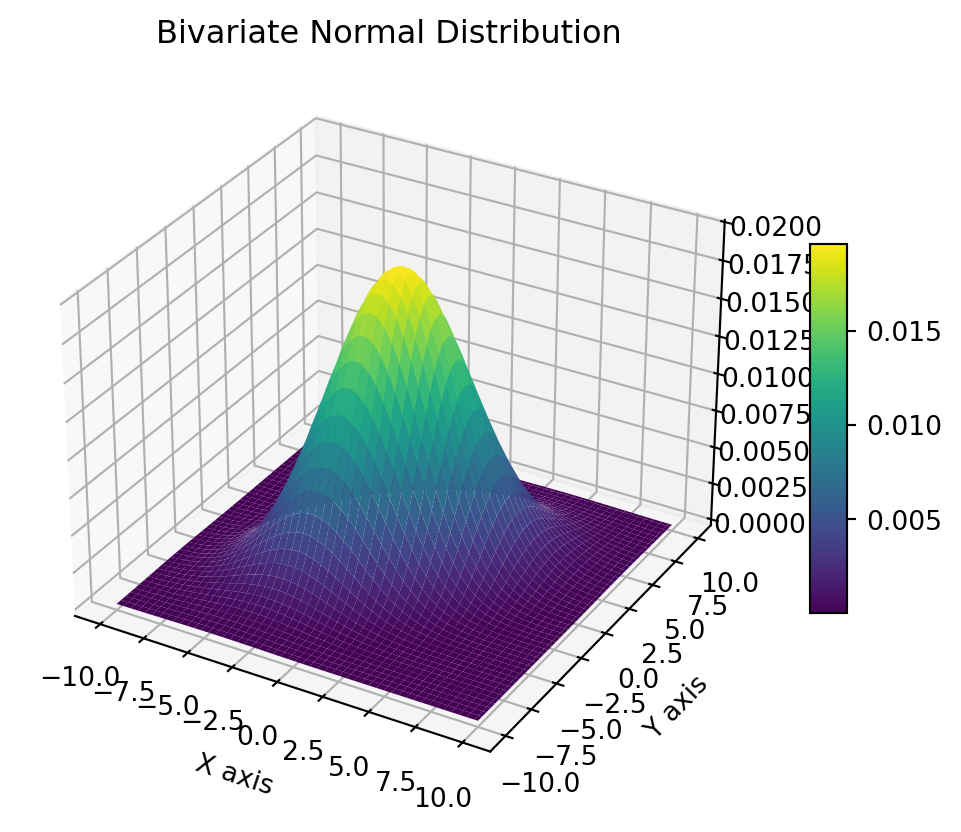

In [18]:
#| label: fig-bi90403d
#| fig-cap: Bivariate Normal. Mean zero and covariance $\Sigma=\begin{pmatrix} 9 & 4 \\ 4 & 9\end{pmatrix}$.
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
mu = np.array([0, 0])
cov = np.array([[9, 4], [4, 9]])

# Create grid and multivariate normal
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mu, cov)

fig = plt.figure()
ax = plt.axes(projection='3d')  
surf=ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Bivariate Normal Distribution')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

::: {#exm-bivariate-normal-zero}
### The Bivariate Normal Distribution with Mean Zero and Zero Covariances

The Bivariate Normal Distribution with Mean Zero and Zero Covariances $\sigma_{12} = \sigma_{21} = 0$.

$\Sigma=\begin{pmatrix} 9 & 0 \\ 0 & 9\end{pmatrix}$


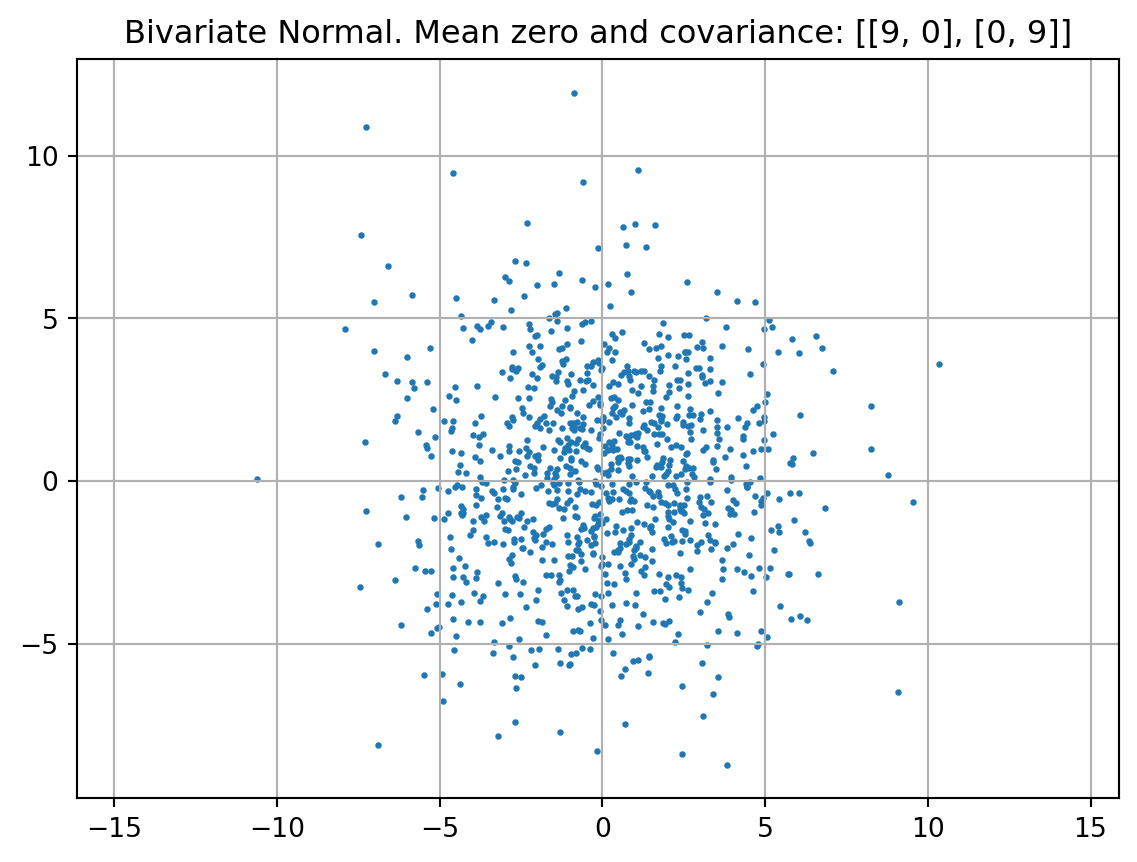

In [19]:
#| echo: false
#| label: fig-bi9000
#| fig-cap: Bivariate Normal. Mean zero and covariance $\Sigma=\begin{pmatrix} 9 & 0 \\ 0 & 9\end{pmatrix}$
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[9, 0], [0, 9]]  # diagonal covariance
x, y = rng.multivariate_normal(mean, cov, 1000).T
plt.scatter(x, y, s=2)
plt.axis('equal')
plt.grid()
plt.title(f"Bivariate Normal. Mean zero and covariance: {cov}")
plt.show()

:::

::: {#exm-bivariate-normal-zero-neg}
### The Bivariate Normal Distribution with Mean Zero and Negative Covariances

The Bivariate Normal Distribution with Mean Zero and Negative Covariances $\sigma_{12} = \sigma_{21} = -4$.

$\Sigma=\begin{pmatrix} 9 & -4 \\ -4 & 9\end{pmatrix}$


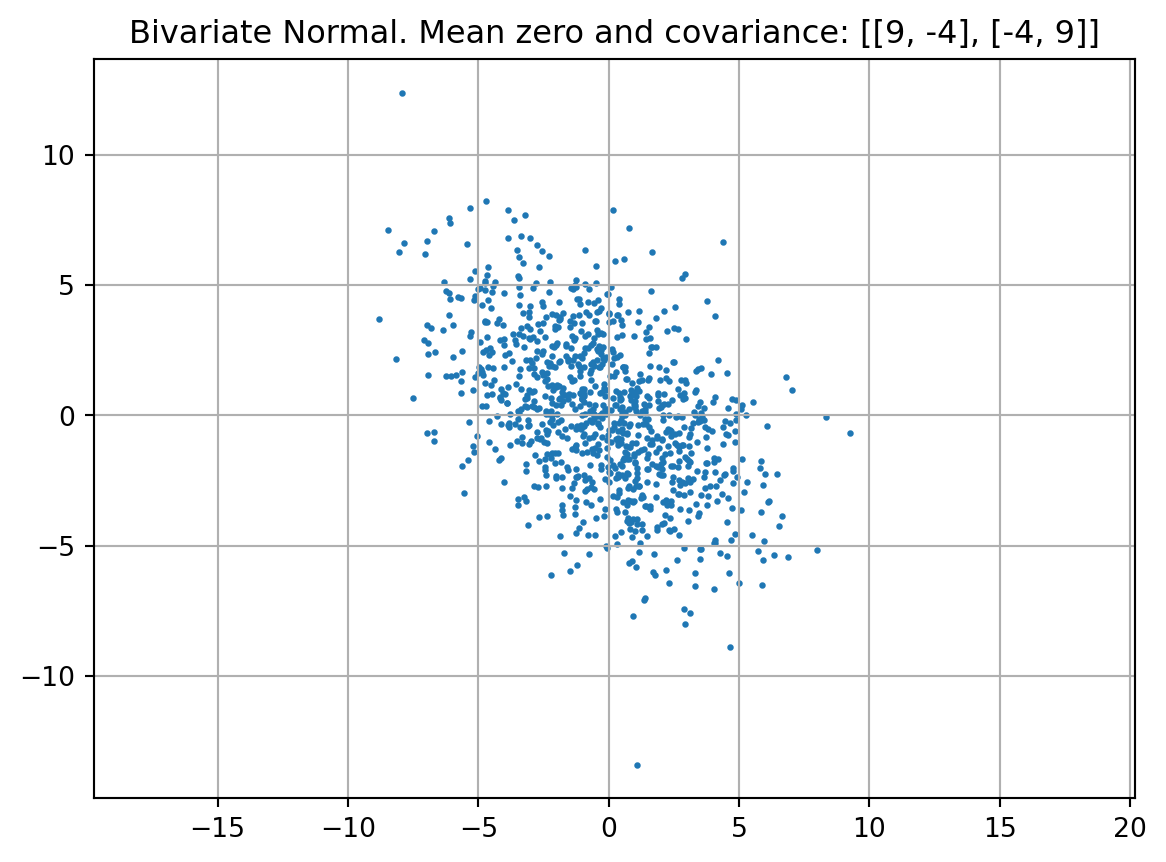

In [20]:
#| echo: false
#| label: fig-bi9449
#| fig-cap: Bivariate Normal. Mean zero and covariance $\Sigma=\begin{pmatrix} 9 & -4 \\ -4 & 9\end{pmatrix}$
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[9, -4], [-4, 9]]  # diagonal covariance
x, y = rng.multivariate_normal(mean, cov, 1000).T
plt.scatter(x, y, s=2)
plt.axis('equal')
plt.grid()
plt.title(f"Bivariate Normal. Mean zero and covariance: {cov}")
plt.show()

:::


## Covariance and Correlation

In a bivariate normal distribution, the covariance matrix and the correlation coefficient are closely related.
The covariance matrix $\Sigma$ for a bivariate normal distribution is a $2\times 2$ matrix that looks like this:

$$
\Sigma =
\begin{pmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{21} & \sigma_2^2
\end{pmatrix},
$$
where $\sigma_1^2$ and $\sigma_2^2$ are the variances of $X_1$ and $X_2$, and $\sigma_{12} = \sigma_{21}$ is the covariance between $X_1$ and $X_2$.

The correlation coefficient, often denoted as $\rho$, is a normalized measure of the linear relationship between two variables. It is calculated from the covariance and the standard deviations $\sigma_1$ and $\sigma_2$ (or the square roots of the variances) of $X_1$ and $X_2$ as follows:
$$
\rho = \sigma_{12} / (\sqrt{\sigma_1^2} \times \sqrt{\sigma_2^2}) = \sigma_{12} / (\sigma_1 \times \sigma_2).
$$

So we can express the correlation coefficient $\rho$ in terms of the elements of the covariance matrix $\Sigma$. It can be interpreted as follows:
The correlation coefficient ranges from -1 to 1. A value of 1 means that $X_1$ and $X_2$ are perfectly positively correlated, a value of -1 means they are perfectly negatively correlated, and a value of 0 means they are uncorrelated. This gives the same information as the covariance, but on a standardized scale that does not depend on the units of $X_1$ and $X_2$.



::: {.callout-note}
### Covariance and Correlation (taken from @Forr08a)

Covariance is a measure of the correlation between two or more sets of random variables.

$$
\text{Cov}(X,Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]
$$

From the covariance, we can derive the correlation

$$
\text{Corr}(X,Y) = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}} = \frac{\text{Cov}(X,Y)}{\sigma_X\sigma_Y}.
$$ {#eq-corrxy}

For a vector of random variables 

$$
Y = 
\begin{pmatrix}
(Y^{(l)}, \ldots, Y^{(n)})
\end{pmatrix}^T
$$

the covariance matrix is a matrix of covariances between the random variables

$$
\Sigma =
\text{Cov}(Y, Y) =
\begin{pmatrix}
\text{Cov}(Y^{(1)}, Y^{(1)}) & \ldots & \text{Cov}(Y^{(1)}, Y^{(n)}) \\
\vdots & \ddots & \vdots \\
\text{Cov}(Y^{(n)}, Y^{(1)}) & \ldots & \text{Cov}(Y^{(n)}, Y^{(n)})
\end{pmatrix},
$$

and from @eq-corrxy

$$
\text{Cov}(Y, Y) = \sigma_Y^2 \text{Cor}(Y, Y).
$$ {#eq-covyy-corr}

:::

You can compute the correlation matrix $\Psi$ from a covariance matrix $\Sigma$ in Python using the numpy library. The correlation matrix is computed by dividing each element of the covariance matrix by the product of the standard deviations of the corresponding variables.

The function `covariance_to_correlation` first computes the standard deviations of the variables with `np.sqrt(np.diag(cov))`. It then computes the correlation matrix by dividing each element of the covariance matrix by the product of the standard deviations of the corresponding variables with `cov / np.outer(std_devs, std_devs)`.


In [21]:
import numpy as np

def covariance_to_correlation(cov):
    # Compute standard deviations
    std_devs = np.sqrt(np.diag(cov))
    
    # Compute correlation matrix
    corr = cov / np.outer(std_devs, std_devs)
    
    return corr

cov = np.array([[9, -4], [-4, 9]])
print(covariance_to_correlation(cov))

[[ 1.         -0.44444444]
 [-0.44444444  1.        ]]


## Cholesky Decomposition and Positive Definite Matrices

The covariance matrix must be positive definite for a multivariate normal distribution for a couple of reasons:

* Semidefinite vs Definite: A covariance matrix is always symmetric and positive semidefinite. However, for a multivariate normal distribution, it must be positive definite, not just semidefinite. This is because a positive semidefinite matrix can have zero eigenvalues, which would imply that some dimensions in the distribution have zero variance, collapsing the distribution in those dimensions. A positive definite matrix has all positive eigenvalues, ensuring that the distribution has positive variance in all dimensions.
* Invertibility: The multivariate normal distribution's probability density function involves the inverse of the covariance matrix. If the covariance matrix is not positive definite, it may not be invertible, and the density function would be undefined.

In summary, the covariance matrix being positive definite ensures that the multivariate normal distribution is well-defined and has positive variance in all dimensions.


The definiteness of a matrix can be checked by examining the eigenvalues of the matrix. If all eigenvalues are positive, the matrix is positive definite.


In [22]:
import numpy as np

def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

matrix = np.array([[9, 4], [4, 9]])
print(is_positive_definite(matrix))  # Outputs: True

True


 However, a more efficient way to check the definiteness of a matrix is through the Cholesky decomposition.

::: {#def-cholesky-decomposition}
### Cholesky Decomposition
For a given symmetric positive-definite matrix $A \in \mathbb{R}^{n \times n}$,
there exists a unique lower triangular matrix $L \in \mathbb{R}^{n \times n}$ with positive diagonal elements such that:

$$
A = L L^T.
$$

Here, $L^T$ denotes the transpose of $L$.
:::

::: {#exm-cholesky-decomposition}
### Cholesky Decomposition

Given a symmetric positive-definite matrix $A = \begin{pmatrix} 9 & 4 \\ 4 & 9 \end{pmatrix}$,
the Cholesky decomposition computes the lower triangular matrix $L$ such that $A = L L^T$.
The matrix $L$ is computed as:
$$
L = \begin{pmatrix} 3 & 0 \\ 4/3 & 2 \end{pmatrix},
$$
so that
$$
L L^T = \begin{pmatrix} 3 & 0 \\ 4/3 & \sqrt{65}/3 \end{pmatrix} \begin{pmatrix} 3 & 4/3 \\ 0 & \sqrt{65}/3 \end{pmatrix} = \begin{pmatrix} 9 & 4 \\ 4 & 9 \end{pmatrix} = A.
$$

:::

An efficient implementation of the definiteness-check based on Cholesky is already available in the `numpy` library.
It provides the `np.linalg.cholesky` function to compute the Cholesky decomposition of a matrix.
This more efficient `numpy`-approach can be used as follows:


In [23]:
import numpy as np

def is_pd(K):
    try:
        np.linalg.cholesky(K)
        return True
    except np.linalg.linalg.LinAlgError as err:
        if 'Matrix is not positive definite' in err.message:
            return False
        else:
            raise
matrix = np.array([[9, 4], [4, 9]])
print(is_pd(matrix))  # Outputs: True

True


::: {#exm-cholesky-decomposition}
### Cholesky decomposition using `numpy`

`linalg.cholesky` computes the Cholesky decomposition of a matrix, i.e., it computes a lower triangular matrix $L$ such that $LL^T = A$. If the matrix is not positive definite, an error (`LinAlgError`) is raised.


In [24]:
import numpy as np

# Define a Hermitian, positive-definite matrix
A = np.array([[9, 4], [4, 9]]) 

# Compute the Cholesky decomposition
L = np.linalg.cholesky(A)

print("L = \n", L)
print("L*LT = \n", np.dot(L, L.T))

L = 
 [[3.         0.        ]
 [1.33333333 2.68741925]]
L*LT = 
 [[9. 4.]
 [4. 9.]]


::: 


## Maximum Likelihood Estimation: Multivariate Normal Distribution

### The Joint Probability Density Function of the Multivariate Normal Distribution

Consider the first $n$ terms of an identically and independently distributed (i.i..d.) sequence ${X^{(j)}}$ of $k$-dimensional multivariate normal random vectors, i.e.,
$$
X^{(j)} \sim N(\mu, \Sigma), j=1,2,\ldots.
$$ {#eq-mvn}

The joint probability density function of the  $j$-th term of the sequence is
$$
f_X(x_j) = \frac{1}{\sqrt{(2\pi)^k \det(\Sigma)}} \exp\left(-\frac{1}{2} (x_j-\mu)^T\Sigma^{-1} (x_j-\mu)\right),
$$

where:
$\mu$ is the $k \times 1$  mean vector;
$\Sigma$ is the  $k \times k$ covariance matrix.
The covariance matrix $\Sigma$ is assumed to be positive definite, so that its determinant is strictly positive.
We use $x_1, \ldots x_n$, i.e., the realizations of the first $n$ random vectors in the sequence, to estimate the two unknown parameters  $\mu$ and  $\Sigma$.

### The Log-Likelihood Function

::: {#def-likelihood}
### Likelihood Function
The likelihood function is defined as the joint probability density function of the observed data, viewed as a function of the unknown parameters.
:::

Since the terms in the sequence @eq-mvn are independent, their joint density is equal to the product of their marginal densities. As a consequence, the likelihood function can be written as the product of the individual densities:

$$
L(\mu, \Sigma) = \prod_{j=1}^n f_X(x_j) = \prod_{j=1}^n \frac{1}{\sqrt{(2\pi)^k \det(\Sigma)}} \exp\left(-\frac{1}{2} (x_j-\mu)^T\Sigma^{-1} (x_j-\mu)\right)
$$
$$
= \frac{1}{(2\pi)^{nk/2} \det(\Sigma)^{n/2}} \exp\left(-\frac{1}{2} \sum_{j=1}^n (x_j-\mu)^T\Sigma^{-1} (x_j-\mu)\right).
$$ {#eq-likelihood-mvn}

Taking the natural logarithm of the likelihood function, we obtain the log-likelihood function:

::: {#exm-log-likelihood}
### Log-Likelihood Function of the Multivariate Normal Distribution

The log-likelihood function of the multivariate normal distribution is given by
$$
\ell(\mu, \Sigma) = -\frac{nk}{2} \ln(2\pi) - \frac{n}{2} \ln(\det(\Sigma)) - \frac{1}{2} \sum_{j=1}^n (x_j-\mu)^T\Sigma^{-1} (x_j-\mu).
$$
:::

The likelihood function is well-defined only if $\det(\Sigma)>0$.


## Constructing a Surrogate

::: {.callout-note}
### Note
This section is based on chapter 2 in @Forr08a.
:::

::: {#def-black-box}
### Black Box Problem
We are trying to learn a mapping that converts the vector $\mathbf{x}$ into a scalar
output $y$, i.e., we are trying to learn a function
$$
y = f(x).
$$
If  function is hidden ("lives in a black box"), so that the physics of the problem is not known, the 
problem is called a black box problem.
:::

This black box could take the form of either a physical or computer experiment, for
example, a finite element code, which calculates the maximum stress ($\sigma$) for given product
dimensions ($\mathbf{x}$).

::: {#def-generic-solution}
### Generic Solution
The generic solution method is to collect the output values $y^{(1)}$, $y^{(2)}$, \ldots, $y^{(n)}$
that result from a set of inputs $\mathbf{x}^{(1)}$, $\mathbf{x}^{(2)}$, \ldots, $\mathbf{x}^{(n)}$ 
and find a best guess $\hat{f}(\mathbf{x})$ for the black box
mapping $f$, based on these known observations.
:::

### Stage One: Preparing the Data and Choosing a Modelling Approach

The first step is the identification, through a small number of observations,
of the inputs that have a significant impact on $f$;
that is the determination of the shortest design variable vector $\mathbf{x} = \{x_1, x_2, \ldots, x_k\}^T$ that, by
sweeping the ranges of all of its variables, can still elicit most of the behavior the black box
is capable of.
The ranges of the various design variables also have to be established at this stage.

The second step is to recruit $n$ of these $k$-vectors into a list 
$$
\mathbf{X} = \{ \mathbf{x}^{(1)},\mathbf{x}^{(2)}, \ldots, \mathbf{x}^{(n)} \}^T,
$$
where each $\mathbf{x}^{(i)}$ is a $k$-vector. The corresponding responses are collected in a vector
such that this represents the design space as thoroughly as possible.

In the surrogate modeling process, the number of samples $n$ is often limited,
as it is constrained by the computational cost (money and/or time)
associated with obtaining each observation.

It is advisable to scale $\mathbf{x}$ at this stage into the unit cube $[0, 1]^k$,
a step that can simplify the subsequent mathematics and prevent multidimensional scaling issues.

We now focus on the attempt to learn $f$ through data pairs 
$$
\{ (\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)}) \}.
$$

This supervised learning process essentially involves searching across the space of possible functions 
$\hat{f}$ that would replicate observations of $f$.
This space of functions is infinite.
Any number of hypersurfaces could be drawn to pass through or near the known observations,
accounting for experimental error.
However, most of these would generalize poorly;
they would be practically useless at predicting responses at new sites, which is the ultimate goal.

::: {#exm-needle-haystack}
### The Needle(s) in the Haystack Function

An extreme example is the 'needle(s) in the haystack' function:

$$
f(x) = \begin{cases} 
y^{(1)}, & \text{if } x = \mathbf{x}^{(1)} \\
y^{(2)}, & \text{if } x = \mathbf{x}^{(2)} \\
\vdots & \\
y^{(n)}, & \text{if } x = \mathbf{x}^{(n)} \\
0, & \text{otherwise.}
\end{cases}
$$

While this predictor reproduces all training data,
it seems counter-intuitive and unsettling to predict 0 everywhere else for most engineering functions.
Although there is a small chance that the function genuinely resembles the equation above and we sampled exactly where the needles are,
it is highly unlikely.
:::

There are countless other configurations, perhaps less contrived, that still generalize poorly.
This suggests a need for systematic means to filter out nonsensical predictors.
In our approach, we embed the structure of $f$ into the model selection algorithm and search over its parameters to fine-tune the approximation to observations. For instance, consider one of the simplest models,
$$
f(x, \mathbf{w}) = \mathbf{w}^T\mathbf{x} + v.
$$ {#eq-linear-model-simple}
Learning $f$ with this model implies that its structure---a hyperplane---is predetermined, and the fitting process involves finding the $k + 1$ parameters (the slope vector $\mathbf{w}$ and the intercept $v$) that best fit the data.
This will be accomplished in Stage Two.

Complicating this further is the noise present in observed responses
(we assume design vectors $\mathbf{x}$ are not corrupted).
Here, we focus on learning from such data, which sometimes risks overfitting.

::: {#def-overfitting}
### Overfitting
Overfitting occurs when the model becomes too flexible and captures not only the underlying trend but also the noise in the data.
:::

In the surrogate modeling process, the second stage as described in  @sec-stage-two,
addresses this issue of complexity control by estimating the parameters of the fixed structure model.
However, foresight is necessary even at the model type selection stage.

Model selection often involves physics-based considerations,
where the modeling technique is chosen based on expected underlying responses.

::: {#exm-model-selection}
### Model Selection

Modeling stress in an elastically deformed solid due to small strains may justify using a simple linear approximation.
Without insights into the physics, and if one fails to account for the simplicity of the data, a more complex and excessively flexible model may be incorrectly chosen. Although parameter estimation might still adjust the approximation to become linear,
an opportunity to develop a simpler and robust model may be lost.

* Simple linear (or polynomial) models, despite their lack of flexibility, have advantages like applicability in further symbolic computations.
* Conversely, if we incorrectly assume a quadratic process when multiple peaks and troughs exist, the parameter estimation stage will not compensate for an unsuitable model choice. A quadratic model is too rigid to fit a multimodal function, regardless of parameter adjustments.

:::

### Stage Two: Parameter Estimation and Training {#sec-stage-two}

Assuming that Stage One helped identify the $k$ critical design variables, acquire the learning data set, and select a generic model structure $f(\mathbf{x}, \mathbf{w})$, the task now is to estimate parameters $\mathbf{w}$ to ensure the model fits the data optimally. Among several estimation criteria, we will discuss two methods here.

::: {#def-mle}

### Maximum Likelihood Estimation

Given a set of parameters $\mathbf{w}$, the model $f(\mathbf{x}, \mathbf{w})$ allows computation of the probability of the data set 
$$
\{(\mathbf{x}^{(1)}, y^{(1)} \pm \epsilon), (\mathbf{x}^{(2)}, y^{(2)} \pm \epsilon), \ldots, (\mathbf{x}^{(n)}, y^{(n)} \pm \epsilon)\}
$$
resulting from $f$ (where $\epsilon$ is a small error margin around each data point).

Taking @eq-likelihood-mvn and assuming errors $\epsilon$ are independently and normally distributed with standard deviation $\sigma$,
the probability of the data set is given by:

$$
P = \frac{1}{(2\pi \sigma^2)^{n/2}} \exp \left[ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} \left( y^{(i)} - f(\mathbf{x}^{(i)}, \mathbf{w}) \right)^2 \epsilon \right].
$$

Intuitively, this is equivalent to the likelihood of the parameters given the data. 
Accepting this intuitive relationship as a mathematical one aids in model parameter estimation.
This is achieved by maximizing the likelihood or, more conveniently, minimizing the negative of its natural logarithm:

$$ 
\min_{\mathbf{w}} \sum_{i=1}^{n} \frac{[y^{(i)} - f(\mathbf{x}^{(i)}, \mathbf{w})]^2}{2\sigma^2} + \frac{n}{2} \ln \epsilon .
$$ {#eq-forr23}

:::


If we assume $\sigma$ and $\epsilon$ are constants, @eq-forr23 simplifies to the well-known least squares criterion:

$$ 
\min_{\mathbf{w}} \sum_{i=1}^{n} [y^{(i)} - f(\mathbf{x}^{(i)}, \mathbf{w})]^2 . 
$$

Cross-validation is another method used to estimate model performance.

::: {#def-cross-validation}
### Cross-Validation
Cross-validation splits the data randomly into $q$ roughly equal subsets,
and then cyclically removing each subset and fitting the model to the remaining $q - 1$ subsets.
A loss function $L$ is then computed to measure the error between the predictor and the withheld subset for each iteration,
with contributions summed over all $q$ iterations.
More formally, if a mapping $\theta: \{1, \ldots, n\} \to \{1, \ldots, q\}$ describes the allocation of the $n$ training points to one of the $q$ subsets and $f^{(-\theta(i))}(\mathbf{x})$ is the predicted value by removing the subset $\theta(i)$ (i.e., the subset where observation $i$ belongs), the cross-validation measure, used as an estimate of prediction error, is:

$$ 
CV = \frac{1}{n} \sum_{i=1}^{n} L(y^{(i)}, f^{(-\theta(i))}(\mathbf{x}^{(i)})) . 
$$ {#eq-cv-basis}

:::

Introducing the squared error as the loss function and considering our generic model $f$ still dependent on undetermined parameters,
we write @eq-cv-basis as:

$$ 
CV = \frac{1}{n} \sum_{i=1}^{n} [y^{(i)} - f^{(-\theta(i))}(\mathbf{x}^{(i)})]^2 .
$$ {#eq-cv-sse}


The extent to which @eq-cv-sse is an unbiased estimator of true risk depends on $q$.
It is shown that if $q = n$, the leave-one-out cross-validation (LOOCV) measure is almost unbiased.
However, LOOCV can have high variance because subsets are very similar.
 @Hast17a) suggest using compromise values like $q = 5$ or $q = 10$.
Using fewer subsets also reduces the computational cost of the cross-validation process, see also @arlot2010 and @Koha95a.

### Stage Three: Model Testing

If there is a sufficient amount of observational data, a random subset should be set aside initially for model testing. @Hast17a recommend setting aside approximately $0.25n$ of $\mathbf{x} \rightarrow y$ pairs for testing purposes. 
These observations must remain untouched during Stages One and Two, as their sole purpose is to evaluate the testing error---the difference between true and approximated function values at the test sites---once the model has been built.
Interestingly, if the main goal is to construct an initial surrogate for seeding a global refinement criterion-based strategy (as discussed in Section 3.2 in @Forr08a), the model testing phase might be skipped.

It is noted that, ideally, parameter estimation (Stage Two) should also rely on a separate subset. However, observational data is rarely abundant enough to afford this luxury (if the function is cheap to evaluate and evaluation sites are selectable, a surrogate model might not be necessary).

When data are available for model testing and the primary objective is a globally accurate model, using either a root mean square error (RMSE) metric or the correlation coefficient ($r^2$) is recommended.
To test the model, a test data set of size $n_t$ is used alongside predictions at the corresponding locations to calculate these metrics, which are defined as follows:

::: {#def-rmse}

### Root Mean Square Error (RMSE)
$$
\text{RMSE} = \sqrt{\frac{1}{n_t} \sum_{i=1}^{n_t} (y^{(i)} - \hat{y}^{(i)})^2}, 
$$
:::

and

::: {#def-r2}
### Correlation Coefficient ($r^2$)

$$ 
r^2 = \frac{\text{cov}(y, \hat{y})}{\sqrt{\text{var}(y)\text{var}(\hat{y})}}, 
$$ {#eq-r2}
:::

@eq-r2 is the correlation coefficient between the observed $y$ and predicted $\hat{y}$ values and can be expanded as:

$$ 
r^2 = \frac{n_t \sum_{i=1}^{n_t} y^{(i)} \hat{y}^{(i)} - \left(\sum_{i=1}^{n_t} y^{(i)}\right) \left(\sum_{i=1}^{n_t} \hat{y}^{(i)}\right)}{\left( n_t \sum_{i=1}^{n_t} (y^{(i)})^2 - \left(\sum_{i=1}^{n_t} y^{(i)}\right)^2 \right) \left( n_t \sum_{i=1}^{n_t} (\hat{y}^{(i)})^2 - \left(\sum_{i=1}^{n_t} \hat{y}^{(i)}\right)^2 \right)}.
$$


Ideally, the RMSE should be minimized, acknowledging its limitation by errors in the objective function $f$ calculation. If the error level is known, like a standard deviation, the aim might be to achieve an RMSE within this value. Often, the target is an RMSE within a specific percentage of the observed data's objective value range. 

The correlation coefficient $r^2$ does not require scaling the data sets and only compares landscape shapes, not values. An $r^2 > 0.8$ typically indicates a surrogate with good predictive capability.


The methods outlined provide quantitative assessments of model accuracy, yet visual evaluations can also be insightful. In general, the RMSE won't reach zero but will stabilize around a low value.
At this point, the surrogate model is saturated with data, and further additions do not enhance the model globally (though local improvements can occur at newly added points if using an interpolating model). 

::: {#exm-tea-sugar}
### The Tea and Sugar Analogy

@Forr08a illustrates this saturation point using a comparision with a cup of tea and sugar.
The tea represents the surrogate model, and sugar represents data. 
Initially, the tea is unsweetened, and adding sugar increases its sweetness.
Eventually, a saturation point is reached where no more sugar dissolves, and the tea cannot get any sweeter.
Similarly, a more flexible model, like one with additional parameters or employing interpolation rather than regression, can increase the saturation point---akin to making a hotter cup of tea for dissolving more sugar.

:::

## Sampling Plans

::: {#def-sampling-plan}

#### Sampling Plan
In the context of computer experiments, the term "sampling plan" refers to the set of input values at which the computer code is evaluated.

:::

The goal of a sampling plan is to efficiently explore the input space to understand the behavior of the computer code and build a surrogate model that accurately represents the code's behavior.
Traditionally, Response Surface Methodology (RSM) has been used to design sampling plans for computer experiments. 
These sampling plans are based on procedures that generate points by means of a rectangiular grid or a factorial design.
However, more recently, Design and Analysis of Computer Experiments (DACE) has emerged as a more flexible and powerful approach for designing sampling plans. `spotpython` uses a class for generating space-filling designs using Latin Hypercube Sampling (LHS) and maximin distance criteria. It is based on `scipy`'s `LatinHypercube` class. The following example demonstrates how to generate a Latin Hypercube Sampling design using `spotpython`. The result is shown in @fig-lhs-spotpython. As can seen in the figure, a Latin hypercube sample generates $n$ points in $[0,1)^{d}$. Each univariate marginal distribution is stratified, placing exactly one point in $[j/n, (j+1)/n)$ for $j=0,1,...,n-1$.


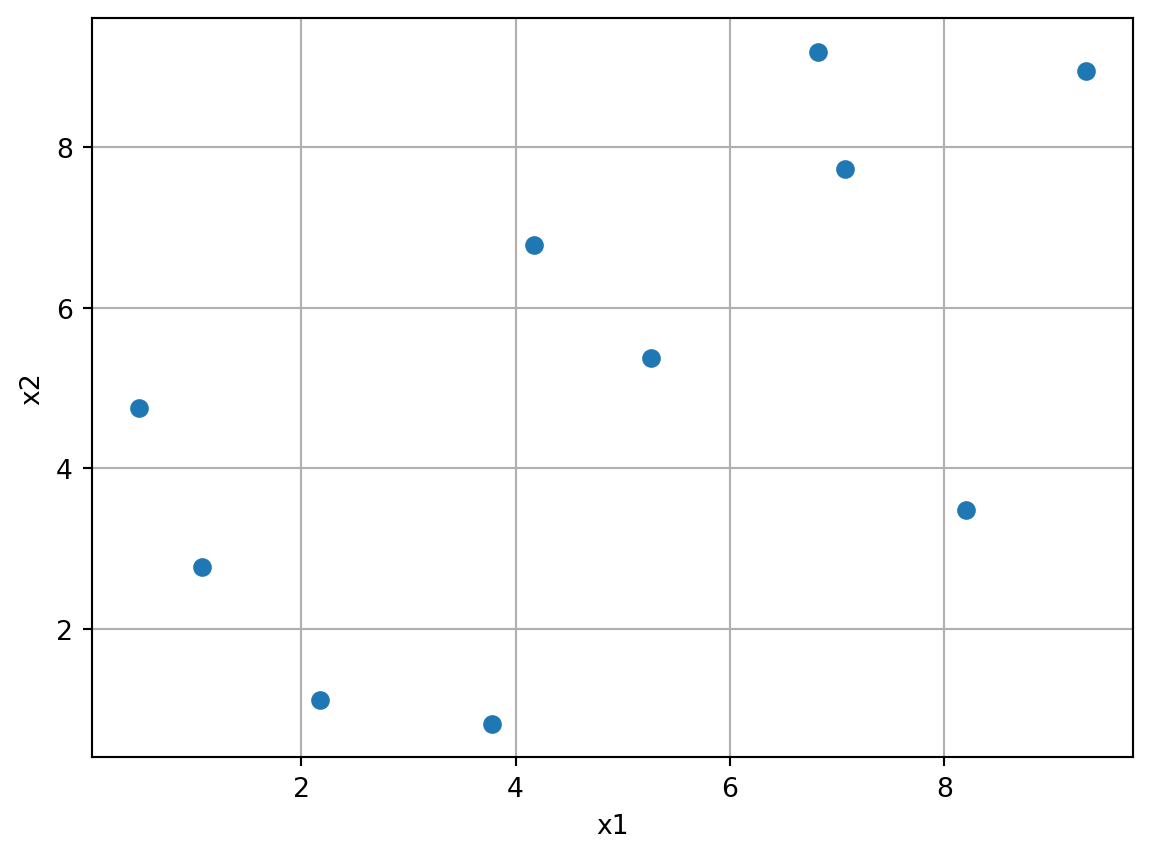

In [25]:
#| label: fig-lhs-spotpython
#| fig-cap: Latin Hypercube Sampling design (sampling plan)
import matplotlib.pyplot as plt
import numpy as np
from spotpython.design.spacefilling import SpaceFilling
lhd = SpaceFilling(k=2, seed=123)
X = lhd.scipy_lhd(n=10, repeats=1, lower=np.array([0, 0]), upper=np.array([10, 10]))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## Kriging

### The Kriging Idea in a Nutshell

Kriging can be applied to planned experiments, where the design is based on a sampling plan as shown in @fig-lhs-spotpython, as well as to computer experiments, where the design is based on the computer code's input space, as shown in @fig-unknownf.


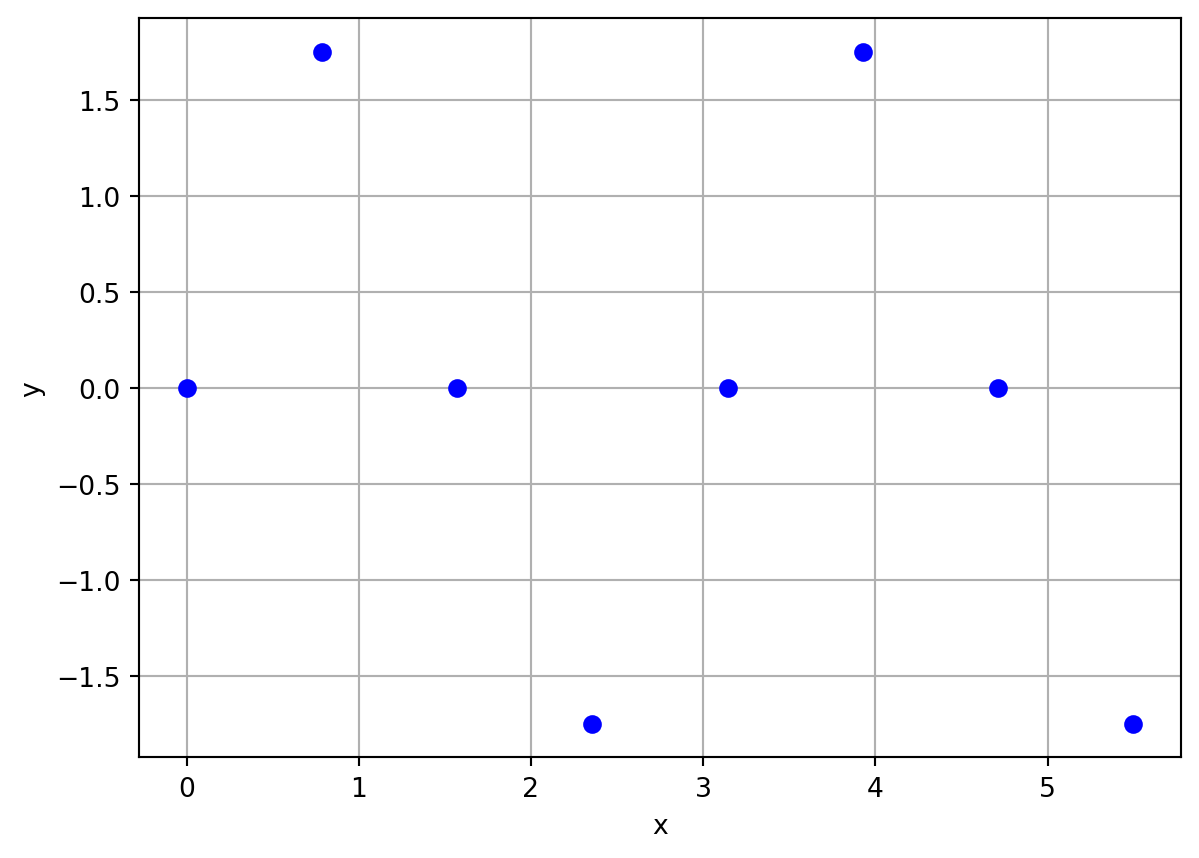

In [26]:
#| label: fig-unknownf
#| fig-cap: Eight measurements of an unknown function. No sampling plan was used.
#| echo: false
import matplotlib.pyplot as plt
import numpy as np
n = 8
X = np.linspace(0, 2*np.pi, n, endpoint=False).reshape(-1,1)
y = 3.5 * np.sin(X)*np.cos(X)
plt.plot(X, y, "bo", label="Measurements")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In general, we onsider observed data of an unknown function $f$ at $n$ points $x_1, \ldots, x_n$.
These measurements a considered as realizations of MVN random variables $Y_1, \ldots, Y_n$ with mean $\mu$ and covariance matrix $\Sigma_n$
as shown in @fig-mvn1-3, @fig-mvn2 or @fig-mvn5.

In Kriging, a more general covariance matrix (or equivalently, a correlation matrix $\Psi$) is used, see @eq-krigingbase.
Using a maximum likelihood approach, we can estimate the unknown parameters $\mu$ and $\Sigma_n$ from the data so that the likelihood function is maximized.


::: {#def-kriging-basis-function}

### The Kriging Basis Functions

Kriging uses $k$-dimensional basis functions of the form 
$$
\psi(\vec{x}^{(i)}, \vec{x}^{(j)}) = \exp \left( - \sum_{l=1}^k \theta_l | x_{l}^{(i)} - x_{l}^{(j)} | ^{p_l} \right),
$$ {#eq-krigingbase}
where $\vec{x}^{(i)}$ denotes the $k$-dim vector $\vec{x}^{(i)}= (x_1^{(i)}, \ldots, x_k^{(i)})^T$.

:::



### The Kriging Model

Consider sample data $\vec{X}$ and $\vec{y}$ from $n$ locations that are available in matrix form:
$\vec{X}$ is a $(n \times k)$ matrix, where $k$ denotes the problem dimension and
$\vec{y}$ is a $(n\times 1)$ vector.
We want to find an expression for a predicted values at a new point $\vec{x}$, denoted as $\hat{y}$.

We start with an abstract, not really intuitive concept:
The observed responses $\vec{y}$ are considered as if they are from a stochastic
process, which will be denoted as
$$
\begin{pmatrix}
\vec{Y}(\vec{x}^{(1)})\\
\vdots\\
\vec{Y}(\vec{x}^{(n)})\\
\end{pmatrix}.
$$ {#eq-yvec-51}

The set of random vectors from @eq-yvec-51 (also referred to as a *random field*) has a mean of $\vec{1} \mu$, which is a $(n\times 1)$ vector.
The random vectors are correlated with each other using the basis function expression from @eq-krigingbase:
$$
\text{cor} \left(\vec{Y}(\vec{x}^{(i)}),\vec{Y}(\vec{x}^{(l)}) \right) = \exp\left\{ - \sum_{j=1}^k \theta_j |x_j^{(i)} - x_j^{(l)} |^{p_j}\right\}.
$$ {#eq-corr-kriging-51}
Using @eq-corr-kriging-51, we can compute the $(n \times n)$ correlation matrix $\vec{\Psi}$ of the observed sample data as shown in @eq-corr-matrix-kriging-51, 

$$
\vec{\Psi} = \begin{pmatrix}
\text{cor}\left(
\vec{Y}(\vec{x}^{(i)}),
\vec{Y}(\vec{x}^{(l)}) 
\right) & \ldots &
\text{cor}\left(
\vec{Y}(\vec{x}^{(i)}),
\vec{Y}(\vec{x}^{(l)}) 
\right)\\
\vdots  & \vdots &  \vdots\\
 \text{cor}\left(
\vec{Y}(\vec{x}^{(i)}),
\vec{Y}(\vec{x}^{(l)}) 
\right)&
\ldots &
\text{cor}\left(
\vec{Y}(\vec{x}^{(i)}),
\vec{Y}(\vec{x}^{(l)}) 
\right)
\end{pmatrix},
$$ {#eq-corr-matrix-kriging-51}

and a covariance matrix as shown in @eq-cov-matrix-kriging-52,

$$
\text{Cov}(\mathbf{Y}, \mathbf{Y} ) = \sigma^2 \mathbf{\Psi}.
$$ {#eq-cov-matrix-kriging-52}

This assumed correlation between the sample data reflects our expectation that an engineering function will behave in a certain way and it will be smoothly and continuous.

We now have a set of $n$ random variables ($\mathbf{Y}$) that are correlated with each other as described in the $(n \times n)$ correlation matrix $\mathbf{\Psi}$, see @eq-corr-matrix-kriging-51. The correlations depend on the absolute distances between sample points $|x_j^{(n)} - x_j^{(n)}|$ and the parameters $p_j$ and $\theta_j$. The correlation is intuitive, because when two points move close together, then $|x_l^{(i)} - x_l| \to 0$ and $\exp(-|x_l^{(i)} - x_l| \to 1$, points show very close correlation and $Y(x_l^{(i)}) = Y(x_l)$.

Three different correlations are shown in @fig-pval12: $p_j= 0.1, 1, 2$. The smoothness parameter $p_j$ affects the correlation:

* With $p_j=0.1$, there is basicaly no immediate correlation between the points and there is a near discontinuity between the points $Y(\vec{x}_j^{(i)})$ and $Y(\vec{x}_j)$.
* With $p_j=2$, the correlation is more smooth and we have a continuous gradient through $x_j^{(i)} - x_j$. 

Reducing $p_j$ increases the rate at which the correlation initially drops with distance. This is shown in @fig-pval12.


In [27]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt

def squared_euclidean_distance(point1, point2, theta=1.0, p_val=2):
    return theta* (point1 - point2)**p_val

def inverse_exp_squared_distance(point1, point2, theta, p_val=2):
    return np.exp(-squared_euclidean_distance(point1=point1, point2=point2, theta=theta, p_val=p_val))

def generate_line(distance, step=0.01):
    return np.arange(0, distance+step, step)

def visualize_inverse_exp_squared_distance_theta(distance, point, theta_values, p_val=2):
    line = generate_line(distance)
    for theta in theta_values:
        distances = [inverse_exp_squared_distance(p, point, theta, p_val) for p in line]
        plt.plot(line, distances, label=f'theta={theta}')
    plt.legend()
    plt.show()

def visualize_inverse_exp_squared_distance_p(distance, point, theta, p_values):
    line = generate_line(distance)
    for p_val in p_values:
        distances = [inverse_exp_squared_distance(p, point, theta, p_val) for p in line]
        plt.plot(line, distances, label=f'p={p_val}')
    plt.legend()
    plt.show()

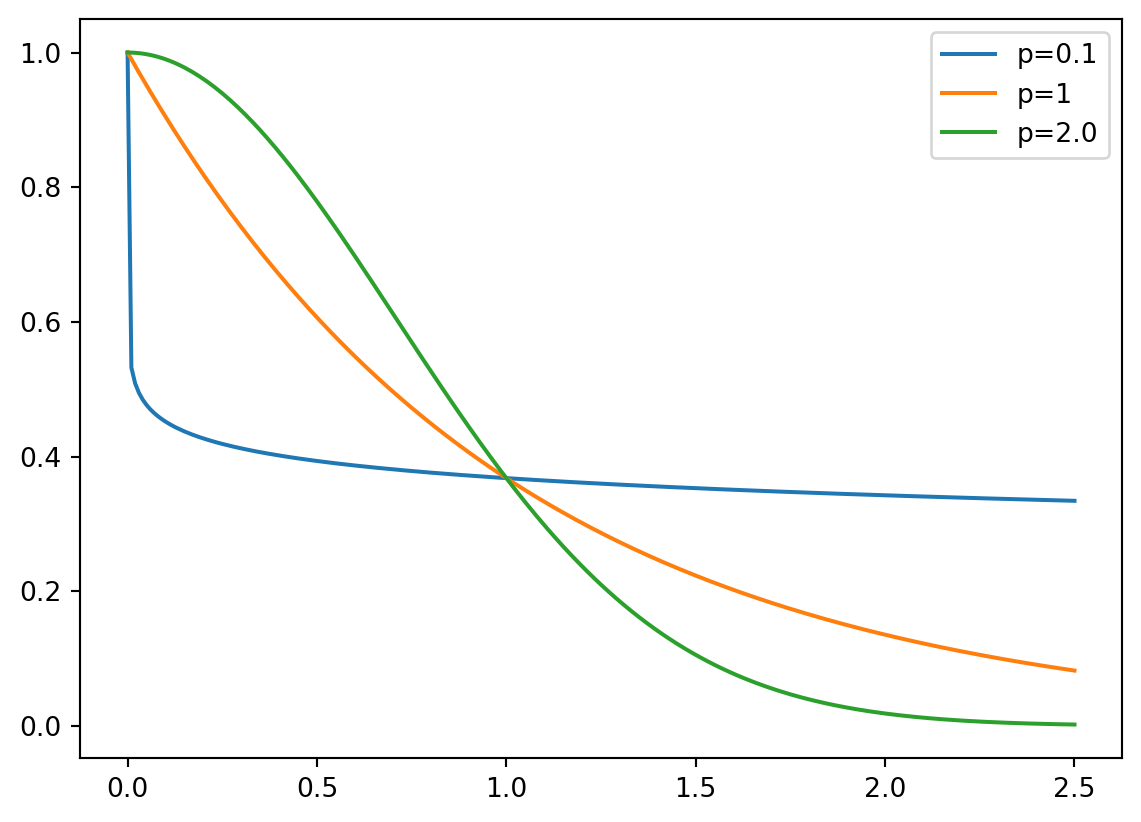

In [28]:
#| label: fig-pval12
#| fig-cap: Correlations with varying $\theta$. $\theta$ set to 1/10, 1, and 10.
#| echo: false
visualize_inverse_exp_squared_distance_p(distance= 2.5, point=0, theta=1, p_values=[0.1, 1, 2.0])

@fig-theta12 visualizes the correlation between two points $Y(\vec{x}_j^{(i)})$ and $Y(\vec{x}_j)$ for different values of $\theta$. The parameter $\theta$ can be seen as a width parameter:

* low $\theta_j$ means that all points will have a high correlation, with $Y(x_j)$ being similar across the sample.
* high $\theta_j$ means that there is a significant difference between the $Y(x_j)$'s.
* $\theta_j$ is a measure of how active the function we are approximating is.
* High $\theta_j$ indicate important parameters, see @fig-theta12.


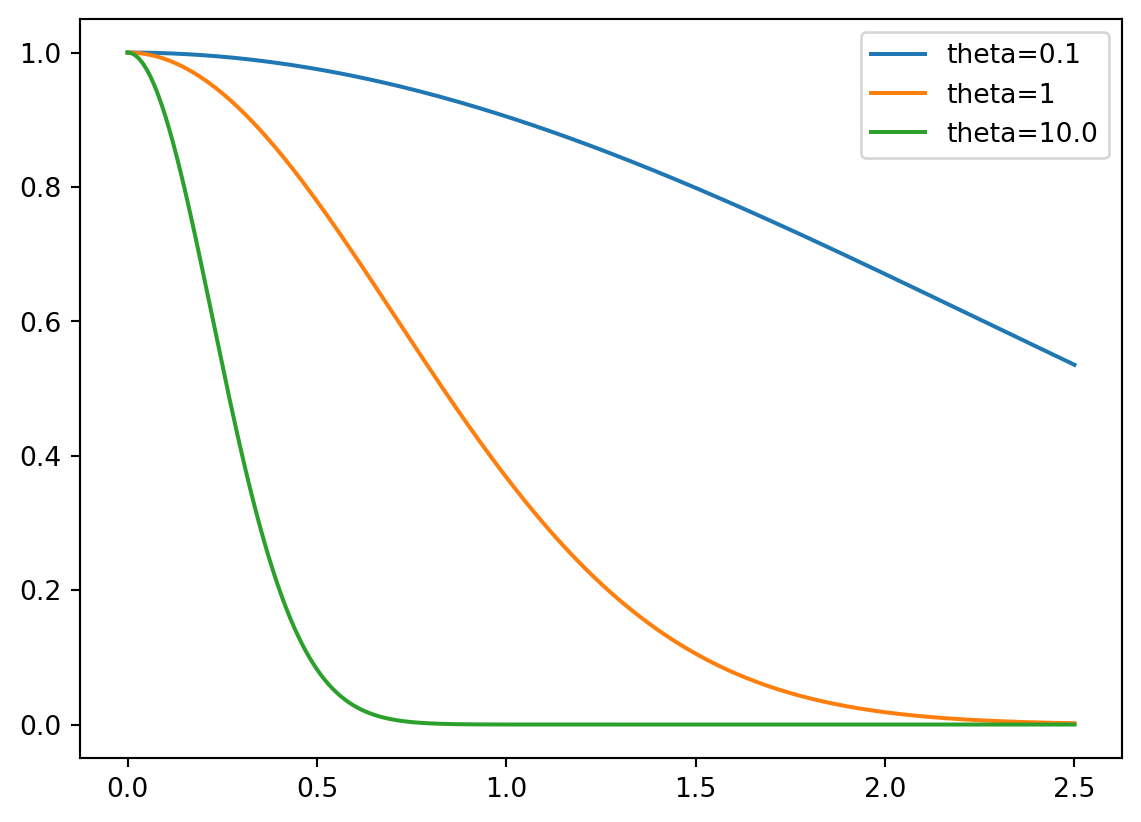

In [29]:
#| label: fig-theta12
#| fig-cap: Correlations with varying $\theta$. $\theta$ set to 1/10, 1, and 10.
#| echo: false
visualize_inverse_exp_squared_distance_theta(distance= 2.5, point=0, theta_values=[0.1, 1, 10.0])

Considering the activity parameter $\theta$ is useful in high-dimensional problems where it is difficult to visualize the design landscape and the effect of the variable is unknown. By examining the elements of the vector $\vec{\theta}$, we can identify the most important variables and focus on them. This is a crucial step in the optimization process, as it allows us to reduce the dimensionality of the problem and focus on the most important variables.



::: {#exm-corr-matrix-detailed}

#### Example: The Correlation Matrix (Detailed Computation)

Let $n=4$ and $k=3$. The sample plan is represented by the following matrix $X$: 
$$
X = \begin{pmatrix} x_{11} & x_{12} & x_{13}\\
x_{21} & x_{22} & x_{23}\\
x_{31} & x_{32} & x_{33}\\
x_{41} & x_{42} & x_{43}\\ 
\end{pmatrix}
$$

To compute the elements of the matrix $\Psi$, the following $k$ (one for each of the $k$ dimensions) $(n,n)$-matrices have to be computed:
$$
D_1 = \begin{pmatrix} x_{11} - x_{11} & x_{11} - x_{21} & x_{11} -x_{31} & x_{11} - x_{41} \\  x_{21} - x_{11} & x_{21} - x_{21} & x_{21} -x_{31} & x_{21} - x_{41} \\ x_{31} - x_{11} & x_{31} - x_{21} & x_{31} -x_{31} & x_{31} - x_{41} \\ x_{41} - x_{11} & x_{41} - x_{21} & x_{41} -x_{31} & x_{41} - x_{41} \\
\end{pmatrix}
$$

$$
D_2 = \begin{pmatrix} x_{12} - x_{12} & x_{12} - x_{22} & x_{12} -x_{32} & x_{12} - x_{42} \\  x_{22} - x_{12} & x_{22} - x_{22} & x_{22} -x_{32} & x_{22} - x_{42} \\ x_{32} - x_{12} & x_{32} - x_{22} & x_{32} -x_{32} & x_{32} - x_{42} \\ x_{42} - x_{12} & x_{42} - x_{22} & x_{42} -x_{32} & x_{42} - x_{42} \\
\end{pmatrix}
$$

$$
D_3 = \begin{pmatrix} x_{13} - x_{13} & x_{13} - x_{23} & x_{13} -x_{33} & x_{13} - x_{43} \\  x_{23} - x_{13} & x_{23} - x_{23} & x_{23} -x_{33} & x_{23} - x_{43} \\ x_{33} - x_{13} & x_{33} - x_{23} & x_{33} -x_{33} & x_{33} - x_{43} \\ x_{43} - x_{13} & x_{43} - x_{23} & x_{43} -x_{33} & x_{43} - x_{43} \\\end{pmatrix}
$$

Since the matrices are symmetric and the main diagonals are zero, it is sufficient to compute the following matrices:
$$
D_1 = \begin{pmatrix} 0 & x_{11} - x_{21} & x_{11} -x_{31} & x_{11} - x_{41} \\  0 &  0 & x_{21} -x_{31} & x_{21} - x_{41} \\ 0 & 0 & 0 & x_{31} - x_{41} \\ 0 & 0 & 0 & 0 \\\end{pmatrix}
$$
$$
D_2 = \begin{pmatrix} 0 & x_{12} - x_{22} & x_{12} -x_{32} & x_{12} - x_{42} \\  0 & 0 & x_{22} -x_{32} & x_{22} - x_{42} \\ 0 & 0 & 0 & x_{32} - x_{42} \\ 0 & 0 & 0 & 0 \\
\end{pmatrix}
$$

$$
D_3 = \begin{pmatrix} 0 & x_{13} - x_{23} & x_{13} -x_{33} & x_{13} - x_{43} \\  0 & 0 & x_{23} -x_{33} & x_{23} - x_{43} \\ 0 & 0 & 0 & x_{33} - x_{43} \\ 0 & 0 & 0 & 0 \\\end{pmatrix}
$$

We will consider $p_l=2$. The differences will be squared and multiplied by $\theta_i$, i.e.:

$$
D_1 = \theta_1 \begin{pmatrix} 0 & (x_{11} - x_{21})^2 & (x_{11} -x_{31})^2 & (x_{11} - x_{41})^2 \\  0 &  0 & (x_{21} -x_{31})^2 & (x_{21} - x_{41})^2 \\ 0 & 0 & 0 & (x_{31} - x_{41})^2 \\ 0 & 0 & 0 & 0 \\\end{pmatrix}
$$

$$
D_2 = \theta_2 \begin{pmatrix} 0 & (x_{12} - x_{22})^2 & (x_{12} -x_{32})^2 & (x_{12} - x_{42})^2 \\  0 & 0 & (x_{22} -x_{32})^2 & (x_{22} - x_{42})^2 \\ 0 & 0 & 0 & (x_{32} - x_{42})^2 \\ 0 & 0 & 0 & 0 \\\end{pmatrix}
$$

$$
D_3 = \theta_3 \begin{pmatrix} 0 & (x_{13} - x_{23})^2 & (x_{13} -x_{33})^2 & (x_{13} - x_{43})^2 \\  0 & 0 & (x_{23} -x_{33})^2 & (x_{23} - x_{43})^2 \\ 0 & 0 & 0 & (x_{33} - x_{43})^2 \\ 0 & 0 & 0 & 0 \\\end{pmatrix}
$$

The sum of the three matrices $D=D_1+ D_2 + D_3$ will be calculated next: 

$$
\begin{pmatrix} 0 & 
\theta_1  (x_{11} - x_{21})^2 + \theta_2 (x_{12} - x_{22})^2 + \theta_3  (x_{13} - x_{23})^2  &
\theta_1 (x_{11} -x_{31})^2 + \theta_2  (x_{12} -x_{32})^2 + \theta_3  (x_{13} -x_{33})^2 &
\theta_1  (x_{11} - x_{41})^2 + \theta_2  (x_{12} - x_{42})^2 + \theta_3 (x_{13} - x_{43})^2
\\  0 &  0 & 
\theta_1  (x_{21} -x_{31})^2 + \theta_2 (x_{22} -x_{32})^2 + \theta_3  (x_{23} -x_{33})^2 &
\theta_1  x_{21} - x_{41})^2 + \theta_2  (x_{22} - x_{42})^2 + \theta_3 (x_{23} - x_{43})^2
\\ 0 & 0 & 0 & 
\theta_1 (x_{31} - x_{41})^2 + \theta_2 (x_{32} - x_{42})^2 + \theta_3 (x_{33} - x_{43})^2
\\ 0 & 0 & 0 & 0 \\\end{pmatrix}
$$

Finally, $$ \Psi = \exp(-D)$$ is computed.

Next, we will demonstrate how this computation can be implemented in Python.


In [30]:
from numpy import (array, zeros, power, ones, exp, multiply,
                    eye, linspace, mat, spacing, sqrt, arange,
                    append, ravel)
from numpy.linalg import cholesky, solve
theta = np.array([1,2,3])
X = np.array([ [1,0,0], [0,1,0], [100, 100, 100], [101, 100, 100]])
X

array([[  1,   0,   0],
       [  0,   1,   0],
       [100, 100, 100],
       [101, 100, 100]])

In [31]:
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [32]:
Psi = build_Psi(X, theta)
Psi

array([[1.        , 0.04978707, 0.        , 0.        ],
       [0.04978707, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.36787944],
       [0.        , 0.        , 0.36787944, 1.        ]])

:::

::: {#exm-corr-matrix-existing}
### Example: The Correlation Matrix (Using Existing Functions)

The same result as computed in the previous example can be obtained with existing python functions, e.g., from the package `scipy`.


In [33]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

def build_Psi(X, theta, eps=sqrt(spacing(1))):
    return exp(- squareform(pdist(X,
                            metric='sqeuclidean',
                            out=None,
                            w=theta))) +  multiply(eye(X.shape[0]),
                                                   eps)

Psi = build_Psi(X, theta, eps=.0)
Psi

array([[1.        , 0.04978707, 0.        , 0.        ],
       [0.04978707, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.36787944],
       [0.        , 0.        , 0.36787944, 1.        ]])

:::

### The Condition Number

A small value, `eps`, can be passed to the function `build_Psi` to improve the condition number. For example, `eps=sqrt(spacing(1))` can be used. The numpy function `spacing()` returns the distance between a number and its nearest adjacent number.

The condition number of a matrix is a measure of its sensitivity to small changes in its elements. It is used to estimate how much the output of a function will change if the input is slightly altered.

A matrix with a low condition number is well-conditioned, which means its behavior is relatively stable, while a matrix with a high condition number is ill-conditioned, meaning its behavior is unstable with respect to numerical precision.


In [34]:
import numpy as np

# Define a well-conditioned matrix (low condition number)
A = np.array([[1, 0.1], [0.1, 1]])
print("Condition number of A: ", np.linalg.cond(A))

# Define an ill-conditioned matrix (high condition number)
B = np.array([[1, 0.99999999], [0.99999999, 1]])
print("Condition number of B: ", np.linalg.cond(B))

Condition number of A:  1.2222222222222225
Condition number of B:  200000000.53159264


In [35]:
np.linalg.cond(Psi)

2.163953413738652

### MLE to estimate $\theta$ and $p$

Until now, the observed data $\vec{y}$ was not used.
We know what the correlations mean, but how do we estimate the values of $\theta_j$ and where does our observed data $y$ come in?
To estimate the values of $\vec{\theta}$ and $\vec{p}$, they are chosen to maximize the likelihood of $\vec{y}$,
which can be expressed in terms of the sample data 
$$L\left(\vec{Y}(\vec{x}^{(1)}), \ldots, \vec{Y}(\vec{x}^{(n)}) | \mu, \sigma \right) = \frac{1}{(2\pi \sigma)^{n/2} |\vec{\Psi}|^{1/2}} \exp\left\{ \frac{-(\vec{y} - \vec{1}\mu)^T \vec{\Psi}^{-1}(\vec{y} - \vec{1}\mu) }{2 \sigma^2}\right\},$$ 
and formulated as the log-likelihood:
$$
\ln(L) = - \frac{n}{2} \ln(2\pi \sigma) - \frac{1}{2} \ln |\vec{\Psi}| \frac{-(\vec{y} - \vec{1}\mu)^T \vec{\Psi}^{-1}(\vec{y} - \vec{1}\mu) }{2 \sigma^2}.
$$ {#eq-loglikelihood-55}

Optimization of the log-likelihood by taking derivatives with respect to $\mu$ and $\sigma$ results in
$$
\hat{\mu} = \frac{\vec{1}^T \vec{\Psi}^{-1} \vec{y}^T}{\vec{1}^T \vec{\Psi}^{-1} \vec{1}^T}
$$ {#eq-muhat-55}
and 
$$
\hat{\sigma}^2 = \frac{(\vec{y} - \vec{1}\mu)^T \vec{\Psi}^{-1}(\vec{y} - \vec{1}\mu)}{n}.
$$ {#eq-sigmahat-55}

Combining the equations, i.e., substituting @eq-muhat-55 and @eq-sigmahat-55 inti @eq-loglikelihood-55 leads to the concentrated log-likelihood function: 
$$
\ln(L) = - \frac{n}{2} \ln(\hat{\sigma}) - \frac{1}{2} \ln |\vec{\Psi}|.
$$ {#eq-concentrated-loglikelihood}

::: {#rem-concentrated-loglikelihood}
### The Concentrated Log-Likelihood
* The first term in @eq-concentrated-loglikelihood requires information about the measured point (observations) $y_i$.
* To maximize $\ln(L)$, optimal values of $\vec{\theta}$ and $\vec{p}$ are determined numerically, because the function (@eq-concentrated-loglikelihood) is not differentiable.
:::

The concentrated log-likelihood function is very quick to compute. We do not need a statistical model, because we are only interested in the maximum likelihood estimate (MLE) of $\theta$ and $p$.
Optimizers such as Nelder-Mead, Conjugate Gradient, or Simulated Annealing can be used to determine optimal values for $\theta$ and $p$.
After the optimization, the correlation matrix $\Psi$ is build with the optimized $\theta$ and $p$ values. This is best (most likely) Kriging model for the given data $y$. 

Observing @fig-theta12, there's significant change between $\theta = 0.1$ and $\theta = 1$, just as there is between $\theta = 1$ and $\theta = 10$. Hence, it is sensible to search for $\theta$ on a logarithmic scale. Suitable search bounds typically range from $10^{-3}$ to $10^2$, although this is not a stringent requirement. Importantly, the scaling of the observed data does not affect the
values of $\hat{\theta}$, but the scaling of the design space does.
Therefore, it is advisable to consistently scale variable ranges between zero and one to ensure consistency in the degree of activity $\hat{\theta}_j$ represents across different problems.

Optimizing $\hat{\phi}$ can enhance prediction accuracy across various problems.

### Implementing an MLE of the Model Parameters

The matrix algebra necessary for calculating the likelihood is the most computationally intensive aspect of the Kriging process. It's crucial to ensure that the code implementation is as efficient as possible.

Given that $\Psi$ (our correlation matrix) is symmetric, only half of the matrix needs to be computed before adding it to its transpose. When calculating the log-likelihood, several matrix inversions are required. The fastest approach is to conduct one Cholesky factorization and then apply backward and forward substitution for each inverse.

The Cholesky factorization is applicable only to positive-definite matrices, which $\Psi$ generally is. However, if $\Psi$ becomes nearly singular, such as when the $\mathbf{x}^{(i)}$'s are densely packed, the Cholesky factorization might fail. In these cases, one could employ an LU-decomposition, though the result might be unreliable. When $\Psi$ is near singular, the best course of action is to either use regression techniques or, as we do here, assign a poor likelihood value to parameters generating the near singular matrix, thus diverting the MLE search towards better-conditioned $\Psi$ matrices.

Another consideration in calculating the concentrated log-likelihood is that $\det(\Psi) \rightarrow 0$ for poorly conditioned matrices, so it is advisable to use twice the sum of the logarithms of the diagonal of the Cholesky factorization when calculating $\ln(\lvert\Psi\rvert)$ in @eq-concentrated-loglikelihood.

### Kriging Prediction

We will use the Kriging correlation $\Psi$ to predict new values based on the observed data. The matrix algebra involved for calculating the likelihood is the most computationally intensive part of the Kriging process. Care must be taken that the computer code is as efficient as possible.

Basic elements of the Kriging based surrogate optimization 
such as interpolation, expected improvement, and regression are presented. The presentation follows the approach described in @Forr08a and @bart21i.

Main idea for prediction is that the new $Y(\vec{x})$ should be consistent with the old sample data $X$.  For a new prediction $\hat{y}$ at $\vec{x}$, the value of $\hat{y}$ is chosen so that it maximizes the likelihood of the sample data $\vec{X}$ and the prediction, given the (optimized) correlation parameter $\vec{\theta}$ and $\vec{p}$ from above.  The observed data $\vec{y}$ is augmented with the new prediction $\hat{y}$ which results in the augmented vector $\vec{\tilde{y}} = ( \vec{y}^T, \hat{y})^T$. A vector of correlations between the observed data and the new prediction is defined as

$$ \vec{\psi} = \begin{pmatrix}
\text{cor}\left(
\vec{Y}(\vec{x}^{(1)}),
\vec{Y}(\vec{x}) 
\right) \\
\vdots  \\
\text{cor}\left(
\vec{Y}(\vec{x}^{(n)}),
\vec{Y}(\vec{x}) 
\right)
\end{pmatrix}
=
\begin{pmatrix}
\vec{\psi}^{(1)}\\
\vdots\\
\vec{\psi}^{(n)}
\end{pmatrix}.
$$

::: {#def-augmented-correlation-matrix}
### The Augmented Correlation Matrix

The augmented correlation matrix is constructed as
$$ \tilde{\vec{\Psi}} =
\begin{pmatrix}
\vec{\Psi} & \vec{\psi} \\
\vec{\psi}^T & 1
\end{pmatrix}.
$$
::: 

The log-likelihood of the augmented data is
$$
\ln(L) = - \frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\hat{\sigma}^2) - \frac{1}{2} \ln |\vec{\hat{\Psi}}| -  \frac{(\vec{\tilde{y}} - \vec{1}\hat{\mu})^T \vec{\tilde{\Psi}}^{-1}(\vec{\tilde{y}} - \vec{1}\hat{\mu})}{2 \hat{\sigma}^2},
$$ {#eq-loglikelihood-augmented}

where $\vec{1}$ is a vector of ones and $\hat{\mu}$ and $\hat{\sigma}^2$ are the MLEs from @eq-muhat-55 and @eq-sigmahat-55. Only the last term in  @eq-loglikelihood-augmented depends on $\hat{y}$, so we need only consider this term in the maximization. Details cen be found in @Forr08a. Finally, the MLE for $\hat{y}$ can be calculated as
$$
\hat{y}(\vec{x}) = \hat{\mu} + \vec{\psi}^T \vec{\tilde{\Psi}}^{-1} (\vec{y} - \vec{1}\hat{\mu}).
$$ {#eq-mle-yhat}

::: {#lem-mle-yhat}
### Properties of the Predictor

@eq-mle-yhat reveals two important properties of the Kriging predictor:

1. Basis functions: The basis function impacts the vector $\vec{\psi}$, which contains the $n$ correlations between the new point $\vec{x}$ and the observed locations. Values from the $n$ basis functions are added to a mean base term $\mu$ with weightings $\vec{w} = \vec{\tilde{\Psi}}^{(-1)} (\vec{y} - \vec{1}\hat{\mu})$.
2. Interpolation: The predictions interpolate the sample data. When calculating the prediction at the $i$th sample point, $\vec{x}^{(i)}$, the $i$th column of $\vec{\Psi}^{-1}$ is $\vec{\psi}$, and $\vec{\psi}  \vec{\Psi}^{-1}$ is the $i$th unit vector. Hence, $\hat{y}(\vec{x}^{(i)}) = y^{(i)}$.

::: 

## Kriging Example: Sinusoid Function 

Toy example in 1d where the response is a simple sinusoid measured at eight equally spaced  $x$-locations in the span of a single period of oscillation.

### Calculating the Correlation Matrix $\Psi$

The correlation matrix $\Psi$ is based on the pairwise squared distances between the input locations. Here we will use $n=8$ sample locations and $\theta$ is set to 1.0.


In [36]:
n = 8
X = np.linspace(0, 2*np.pi, n, endpoint=False).reshape(-1,1)
# theta should be an array (of one value, for the moment, will be changed later)
theta = np.array([1.0])
Psi = build_Psi(X, theta)

Evaluate at sample points


In [37]:
y = np.sin(X)

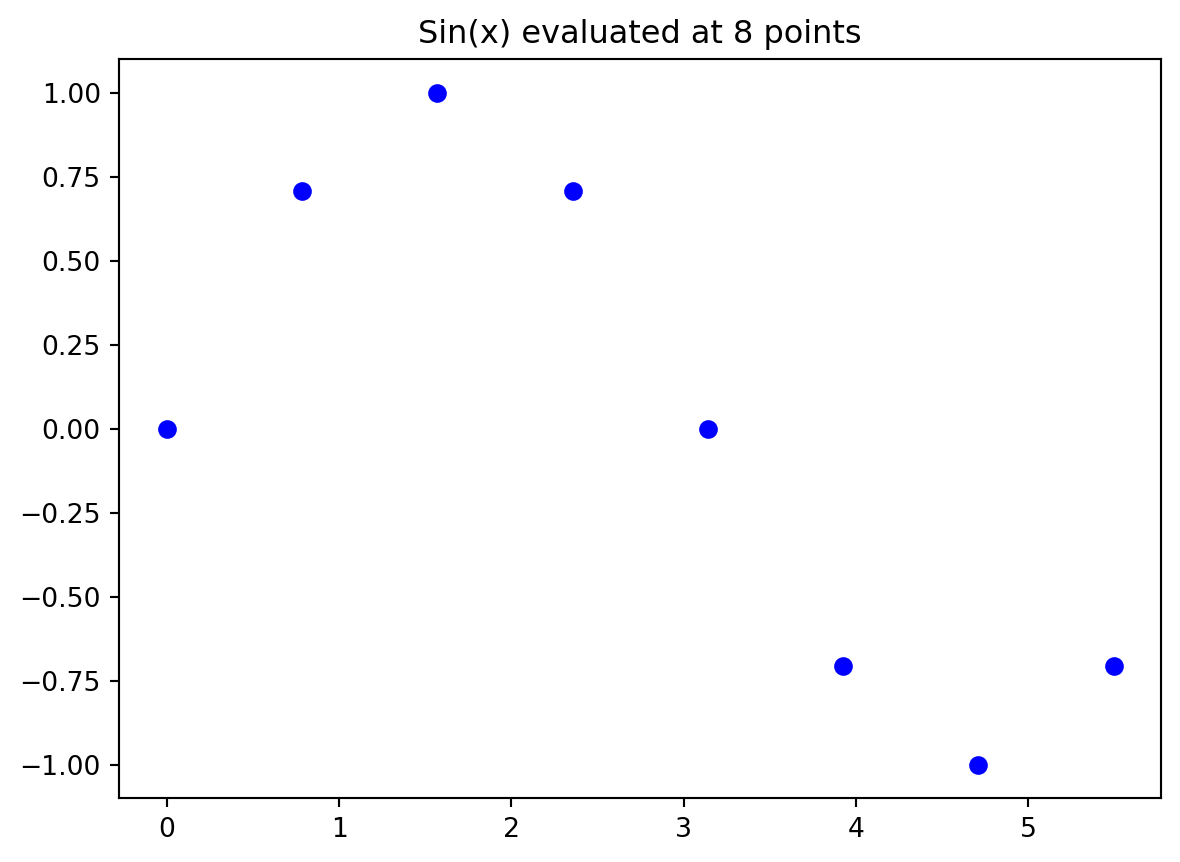

In [38]:
import matplotlib.pyplot as plt
plt.plot(X, y, "bo")
plt.title(f"Sin(x) evaluated at {n} points")
plt.show()

### Computing the $\psi$ Vector

Distances between testing locations $x$ and training data locations $X$.


In [39]:
from scipy.spatial.distance import cdist

def build_psi(X, x, theta, eps=sqrt(spacing(1))):
    n = X.shape[0]
    k = X.shape[1]
    m = x.shape[0]
    psi = zeros((n, m))
    theta = theta * ones(k)
    D = zeros((n, m))
    D = cdist(x.reshape(-1, k),
              X.reshape(-1, k),
              metric='sqeuclidean',
              out=None,
              w=theta)
    print(D.shape)
    psi = exp(-D)
    # return psi transpose to be consistent with the literature
    return(psi.T)

### Predicting at New Locations

We would like to predict at $m = 100$ new locations in the interval $[0, 2\pi]$. The new locations are stored in the variable `x`.


In [40]:
m = 100
x = np.linspace(0, 2*np.pi, m, endpoint=False).reshape(-1,1)
psi = build_psi(X, x, theta)

(100, 8)


Computation of the predictive equations.
CV

In [41]:
U = cholesky(Psi).T
one = np.ones(n).reshape(-1,1)
mu = (one.T.dot(solve(U, solve(U.T, y)))) / one.T.dot(solve(U, solve(U.T, one)))
f = mu * ones(m).reshape(-1,1) + psi.T.dot(solve(U, solve(U.T, y - one * mu)))

To compute $f$, @eq-mle-yhat is used. 

### Visualization


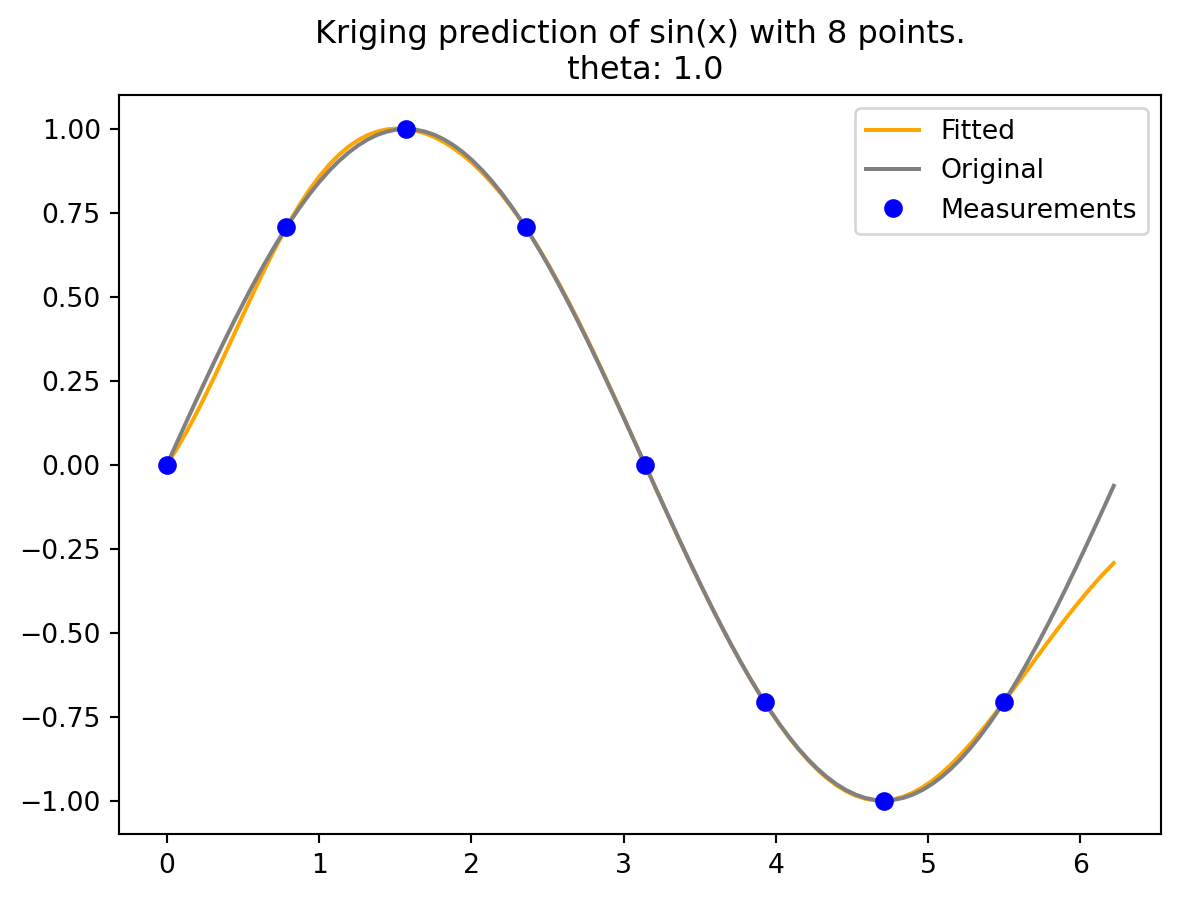

In [42]:
import matplotlib.pyplot as plt
plt.plot(x, f, color = "orange", label="Fitted")
plt.plot(x, np.sin(x), color = "grey", label="Original")
plt.plot(X, y, "bo", label="Measurements")
plt.title("Kriging prediction of sin(x) with {} points.\n theta: {}".format(n, theta[0]))
plt.legend(loc='upper right')
plt.show()

## Cholesky Decomposition

### Example of Cholesky Decomposition

We consider dimension $k=1$ and $n=2$ sample points.
The sample points are located at $x_1=1$ and $x_2=5$. 
The response values are $y_1=2$ and $y_2=10$.
The correlation parameter is $\theta=1$ and $p$ is set to $1$.
Using @eq-krigingbase, we can compute the correlation matrix $\Psi$:

$$
\Psi = \begin{pmatrix}
1 & e^{-1}\\
e^{-1} & 1
\end{pmatrix}.
$$

To determine MLE as in @eq-mle-yhat, we need to compute $\Psi^{-1}$:

$$
\Psi^{-1} = \frac{e}{e^2 -1} \begin{pmatrix}
e & -1\\
-1 & e
\end{pmatrix}.
$$

Cholesky-decomposition of $\Psi$ is recommended to compute $\Psi^{-1}$. Cholesky decomposition is a decomposition of a positive definite symmetric matrix into the product of a lower triangular matrix $L$, a diagonal matrix $D$ and the transpose of $L$, which is denoted as $L^T$.
Consider the following example:

$$
LDL^T=
\begin{pmatrix}
1 & 0 \\
l_{21} & 1
\end{pmatrix}
\begin{pmatrix}
d_{11} & 0 \\
0 & d_{22}
\end{pmatrix}
\begin{pmatrix}
1 & l_{21} \\
0 & 1
\end{pmatrix}=
$$

$$
\begin{pmatrix}
d_{11} & 0 \\
d_{11} l_{21} & d_{22}
\end{pmatrix}
\begin{pmatrix}
1 & l_{21} \\
0 & 1
\end{pmatrix}
=
\begin{pmatrix}
d_{11} & d_{11} l_{21} \\
d_{11} l_{21} & d_{11} l_{21}^2 + d_{22}
\end{pmatrix}.
$$ {#eq-cholex}



Using @eq-cholex, we can compute the Cholesky decomposition of $\Psi$:

1. $d_{11} = 1$,
2. $l_{21}d_{11} = e^{-1} \Rightarrow l_{21} = e^{-1}$, and
3. $d_{11} l_{21}^2 + d_{22} = 1 \Rightarrow d_{22} = 1 - e^{-2}$.

The Cholesky decomposition of $\Psi$ is
$$
\Psi = \begin{pmatrix}
1 & 0\\
e^{-1} & 1\\
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
0 & 1 - e^{-2}\\
\end{pmatrix}
\begin{pmatrix}
1 & e^{-1}\\
0 & 1\\
\end{pmatrix}
= LDL^T$$

Some programs use $U$ instead of $L$. The Cholesky decomposition of $\Psi$ is
$$
\Psi = LDL^T = U^TDU.
$$

Using 
$$
\sqrt{D} =\begin{pmatrix}
1 & 0\\
0 & \sqrt{1 - e^{-2}}\\
\end{pmatrix},
$$
we can write the Cholesky decomposition of $\Psi$ without a diagonal matrix $D$ as
$$
\Psi = \begin{pmatrix}
1 & 0\\
e^{-1} & \sqrt{1 - e^{-2}}\\
\end{pmatrix}
\begin{pmatrix}
1 & e^{-1}\\
0 & \sqrt{1 - e^{-2}}\\
\end{pmatrix}
= U^TU.
$$


### Inverse Matrix Using Cholesky Decomposition

To compute the inverse of a matrix using the Cholesky decomposition, you can follow these steps:

1. Decompose the matrix $A$ into $L$ and $L^T$, where $L$ is a lower triangular matrix and $L^T$ is the transpose of $L$.
2. Compute $L^{-1}$, the inverse of $L$.
3. The inverse of $A$ is then $(L^{-1})^T  L^-1$.

Please note that this method only applies to symmetric, positive-definite matrices.

The inverse of the matrix $\Psi$ from above is:

$$
\Psi^{-1} = \frac{e}{e^2 -1} \begin{pmatrix}
e & -1\\
-1 & e
\end{pmatrix}.
$$


Here’s an example of how to compute the inverse of a matrix using Cholesky decomposition in Python:


In [43]:
import numpy as np
from scipy.linalg import cholesky, inv
E = np.exp(1)

# Psi is a symmetric, positive-definite matrix 
Psi = np.array([[1, 1/E], [1/E, 1]])
L = cholesky(Psi, lower=True)
L_inv = inv(L)
# The inverse of A is (L^-1)^T * L^-1
Psi_inv = np.dot(L_inv.T, L_inv)

print("Psi:\n", Psi)
print("Psi Inverse:\n", Psi_inv)

Psi:
 [[1.         0.36787944]
 [0.36787944 1.        ]]
Psi Inverse:
 [[ 1.15651764 -0.42545906]
 [-0.42545906  1.15651764]]


## Gaussian Processes---Some Background Information

The concept of GP (Gaussian Process) regression can be understood as a simple extension of linear modeling. It is worth noting that this approach goes by various names and acronyms, including "kriging," a term derived from geostatistics, as introduced by Matheron in 1963. Additionally, it is referred to as Gaussian spatial modeling or a Gaussian stochastic process, and machine learning (ML) researchers often use the term Gaussian process regression (GPR).
In all of these instances, the central focus is on regression. This involves training on both inputs and outputs, with the ultimate objective of making predictions and quantifying uncertainty (referred to as uncertainty quantification or UQ).

However, it's important to emphasize that GPs are not a universal solution for every problem. Specialized tools may outperform GPs in specific, non-generic contexts, and GPs have their own set of limitations that need to be considered.

### Gaussian Process Prior

In the context of GP, any finite collection of realizations, which is represented by $n$ observations, is modeled as having a multivariate normal (MVN) distribution. The characteristics of these realizations can be fully described by two key parameters:

1. Their mean, denoted as an $n$-vector $\mu$.
2. The covariance matrix, denoted as an $n \times n$ matrix $\Sigma$. This covariance matrix encapsulates the relationships and variability between the individual realizations within the collection.


### Covariance Function

The covariance function is defined by inverse exponentiated squared Euclidean distance:
$$
\Sigma(\vec{x}, \vec{x}') = \exp\{ - || \vec{x} - \vec{x}'||^2 \},
$$
where $\vec{x}$ and $\vec{x}'$ are two points in the $k$-dimensional input space and $\| \cdot \|$ denotes the Euclidean distance, i.e.,
$$
|| \vec{x} - \vec{x}'||^2 = \sum_{i=1}^k (x_i - x_i')^2.
$$

An 1-d example is shown in @fig-exp2euclid. 


In [44]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt

def squared_euclidean_distance(point1, point2, sigma2=1.0):
    return (point1 - point2)**2/ (2 * sigma2)

def inverse_exp_squared_distance(point1, point2,sigma2):
    return np.exp(-squared_euclidean_distance(point1, point2, sigma2))

def generate_line(distance, step=0.01):
    return np.arange(0, distance+step, step)

def visualize_inverse_exp_squared_distance(distance, point, sigma2_values):
    line = generate_line(distance)
    
    for sigma2 in sigma2_values:
        distances = [inverse_exp_squared_distance(p, point, sigma2) for p in line]
        plt.plot(line, distances, label=f'sigma2={sigma2}')
    
    plt.legend()
    plt.show()

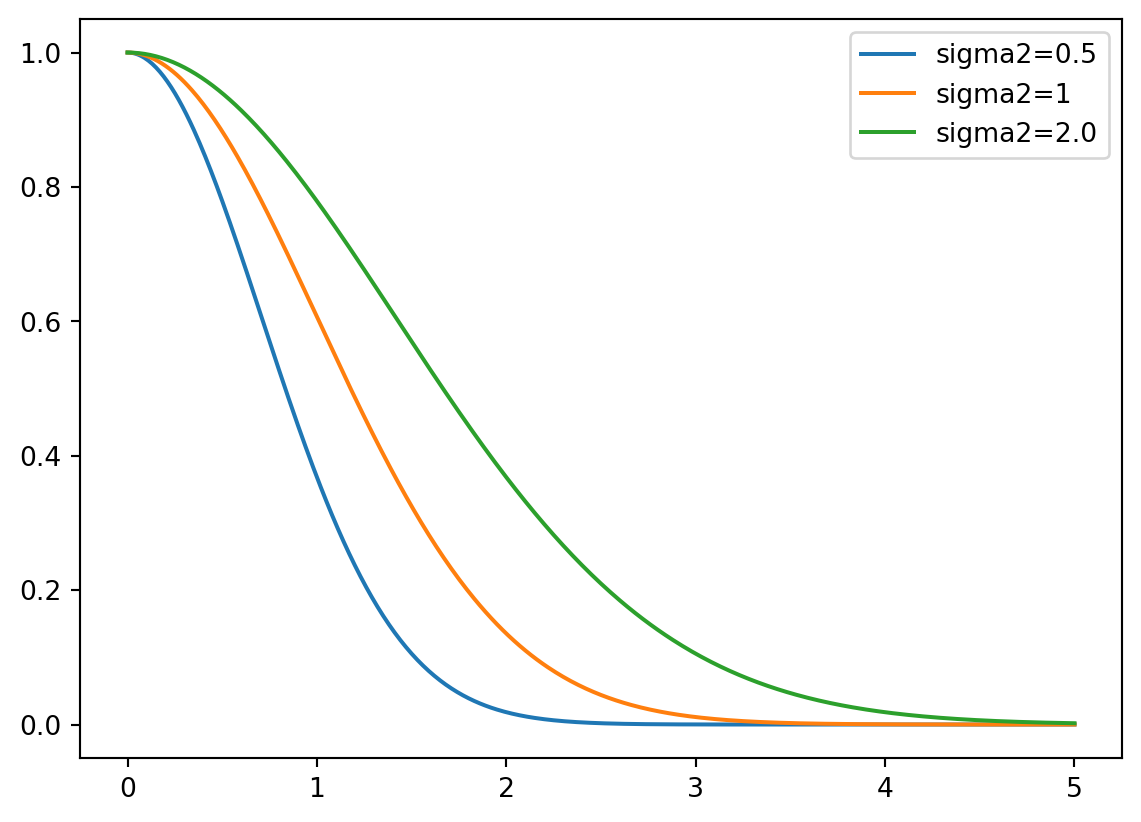

In [45]:
#| label: fig-exp2euclid
#| fig-cap: One-dim inverse exponentiated squared Euclidean distance
#| echo: false
visualize_inverse_exp_squared_distance(5, 0.0, [0.5, 1, 2.0])

The covariance function is also referred to as the kernel function. The *Gaussian* kernel uses an additional parameter, $\sigma^2$, to control the rate of decay. This parameter is referred to as the length scale or the characteristic length scale. The covariance function is then defined as 

$$
\Sigma(\vec{x}, \vec{x}') = \exp\{ - || \vec{x} - \vec{x}'||^2 / (2 \sigma^2) \}.
$$ {#eq-Sigma}

The covariance decays exponentially fast as $\vec{x}$ and $\vec{x}'$ become farther apart. Observe that 

$$
\Sigma(\vec{x},\vec{x}) = 1
$$ 
and 

$$
\Sigma(\vec{x}, \vec{x}') < 1
$$ 
for  $\vec{x} \neq \vec{x}'$. The function $\Sigma(\vec{x},\vec{x}')$ must be positive definite.


::: {#rem-krigingbase-gauss}
### Kriging and Gaussian Basis Functions

The Kriging basis function (@eq-krigingbase) is related to the 1-dim Gaussian basis function (@eq-Sigma),
which is defined as
$$
\Sigma(\vec{x}^{(i)}, \vec{x}^{(j)}) = \exp\{ - || \vec{x}^{(i)} - \vec{x}^{(j)}||^2 / (2\sigma^2) \}.
$$ {#eq-Sigma2}

There are some differences between Gaussian basis functions and Kriging basis functions:

  * Where the Gaussian basis function has $1/(2\sigma^2)$, the Kriging basis has a vector $\theta = [\theta_1, \theta_2, \ldots, \theta_k]^T$.
  * The $\theta$ vector allows the width of the basis function to vary from dimension to dimension.
  * In the Gaussian basis function, the exponent is fixed at 2, Kriging allows this exponent $p_l$ to vary (typically from 1 to 2).

:::


#### Positive Definiteness

Positive definiteness in the context of the covariance matrix $\Sigma_n$ is a fundamental requirement. It is determined by evaluating $\Sigma(x_i, x_j)$ at pairs of $n$ $\vec{x}$-values, denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_n$. The condition for positive definiteness is that for all $\vec{x}$ vectors that are not equal to zero, the expression $\vec{x}^\top \Sigma_n \vec{x}$ must be greater than zero. This property is essential when intending to use $\Sigma_n$ as a covariance matrix in multivariate normal (MVN) analysis. It is analogous to the requirement in univariate Gaussian distributions where the variance parameter, $\sigma^2$, must be positive.



Gaussian Processes (GPs) can be effectively utilized to generate random data that follows a smooth functional relationship. The process involves the following steps:

1. Select a set of $\vec{x}$-values, denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_n$.
2. Define the covariance matrix $\Sigma_n$ by evaluating $\Sigma_n^{ij} = \Sigma(\vec{x}_i, \vec{x}_j)$ for $i, j = 1, 2, \ldots, n$.
3. Generate an $n$-variate realization $Y$ that follows a multivariate normal distribution with a mean of zero and a covariance matrix $\Sigma_n$, expressed as $Y \sim \mathcal{N}_n(0, \Sigma_n)$.
4. Visualize the result by plotting it in the $x$-$y$ plane.

### Construction of the Covariance Matrix

Here is an one-dimensional example. The process begins by creating an input grid using $\vec{x}$-values. This grid consists of 100 elements, providing the basis for further analysis and visualization.


In [46]:
import numpy as np
n = 100
X = np.linspace(0, 10, n, endpoint=False).reshape(-1,1)

In the context of this discussion, the construction of the covariance matrix, denoted as $\Sigma_n$, relies on the concept of inverse exponentiated squared Euclidean distances. However, it's important to note that a modification is introduced later in the process. Specifically, the diagonal of the covariance matrix is augmented with a small value, represented as "eps" or $\epsilon$.

The reason for this augmentation is that while inverse exponentiated distances theoretically ensure the covariance matrix's positive definiteness, in practical applications, the matrix can sometimes become numerically ill-conditioned. By adding a small value to the diagonal, such as $\epsilon$, this ill-conditioning issue is mitigated. In this context, $\epsilon$ is often referred to as "jitter."


In [47]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Sigma(X, sigma2):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = 1/(2*sigma2[l])*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [48]:
sigma2 = np.array([1.0])
Sigma = build_Sigma(X, sigma2)
np.round(Sigma[:3,:], 3)

array([[1.   , 0.995, 0.98 , 0.956, 0.923, 0.882, 0.835, 0.783, 0.726,
        0.667, 0.607, 0.546, 0.487, 0.43 , 0.375, 0.325, 0.278, 0.236,
        0.198, 0.164, 0.135, 0.11 , 0.089, 0.071, 0.056, 0.044, 0.034,
        0.026, 0.02 , 0.015, 0.011, 0.008, 0.006, 0.004, 0.003, 0.002,
        0.002, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.995, 1.   , 0.995, 0.98 , 0.956, 0.923, 0.882, 0.835, 0.783,
        0.726, 0.667, 0.607, 0.546, 0.487, 0.43 , 0.375, 0.325, 0.278,
        0.236, 0.198, 0.164, 0.135, 0.11 , 0.089, 0.071, 0.05

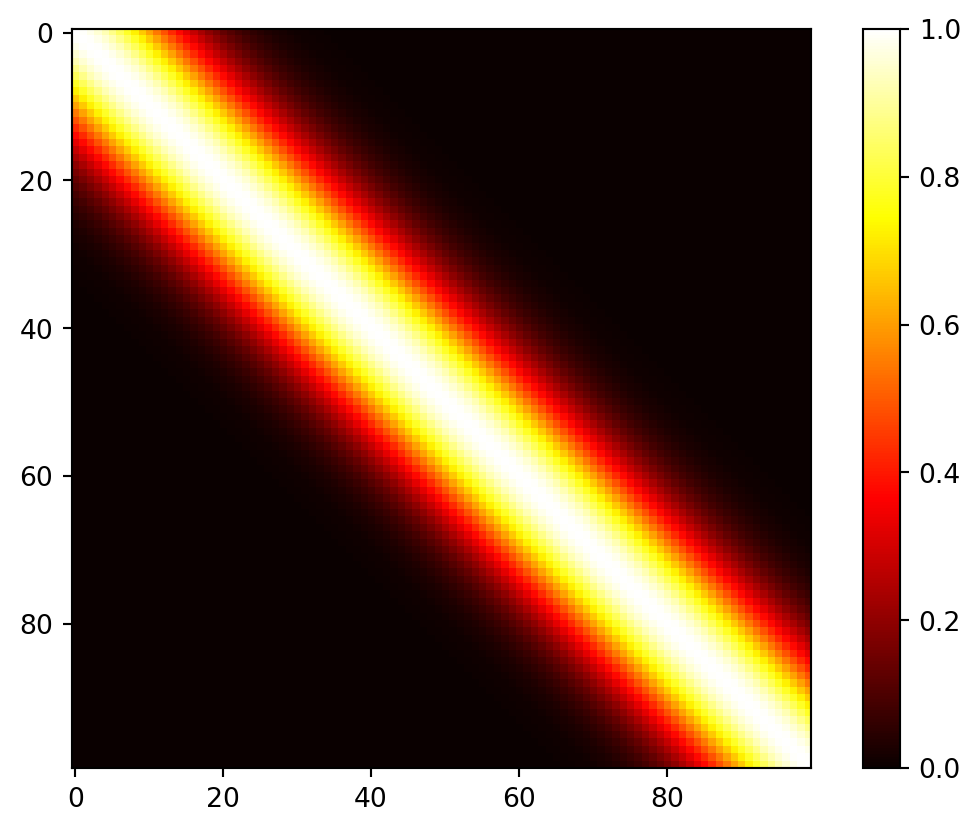

In [49]:
import matplotlib.pyplot as plt
plt.imshow(Sigma, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

### Generation of Random Samples and Plotting the Realizations of the Random Function

In the context of the multivariate normal distribution, the next step is to utilize the previously constructed covariance matrix denoted as `Sigma`. It is used as an essential component in generating random samples from the multivariate normal distribution.

The function `multivariate_normal` is employed for this purpose. It serves as a random number generator specifically designed for the multivariate normal distribution. In this case, the mean of the distribution is set equal to `mean`, and the covariance matrix is provided as `Psi`. The argument `size` specifies the number of realizations, which, in this specific scenario, is set to one.

By default, the mean vector is initialized to zero. To match the number of samples, which is equivalent to the number of rows in the `X` and `Sigma` matrices, the argument `zeros(n)` is used, where `n` represents the number of samples (here taken from the size of the matrix, e.g.,: `Sigma.shape[0]`).


In [50]:
rng = np.random.default_rng(seed=12345)
Y = rng.multivariate_normal(zeros(Sigma.shape[0]), Sigma, size = 1, check_valid="raise").reshape(-1,1)
Y.shape

(100, 1)

Now we can plot the results, i.e., a finite realization of the random function $Y()$ under a GP prior with a particular covariance structure. We will plot those `X` and `Y` pairs as connected points on an  $x$-$y$ plane.


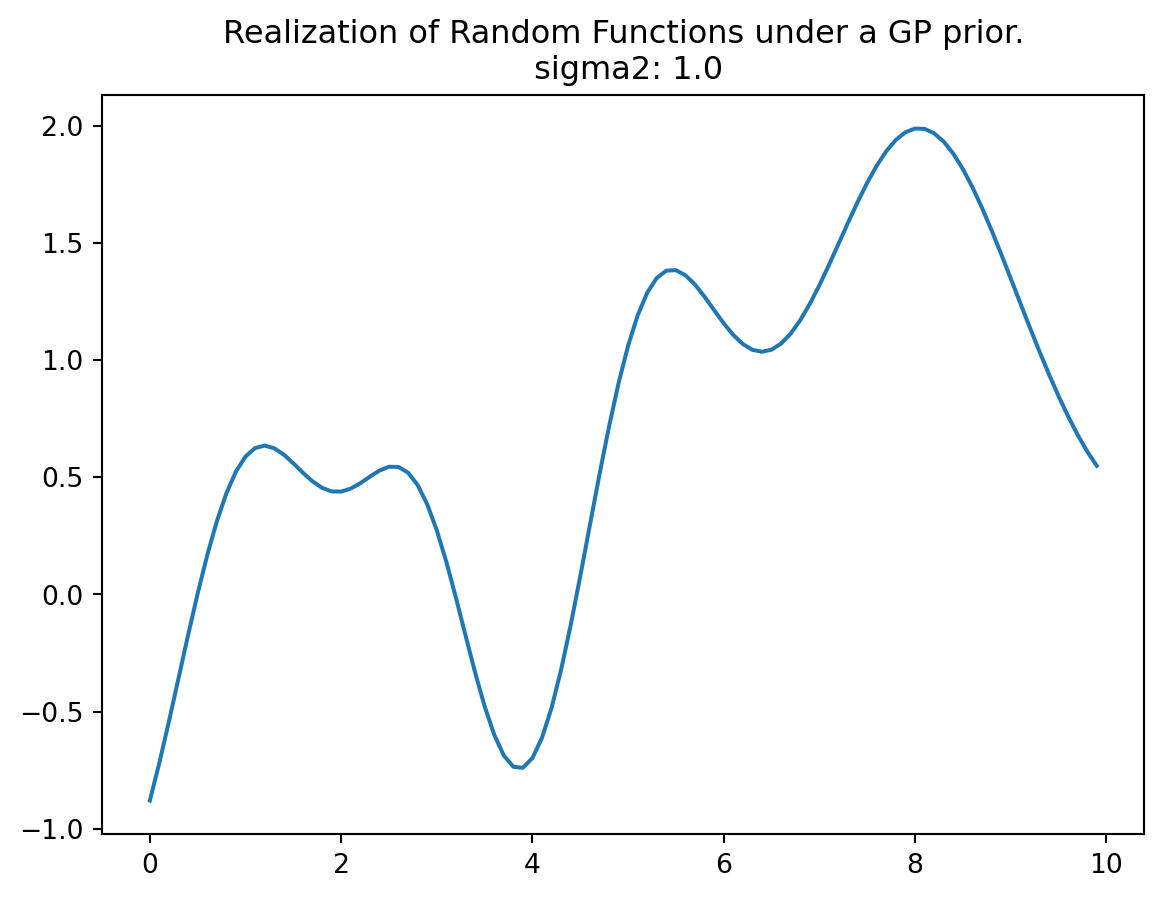

In [51]:
#| label: fig-mvn1-1
#| fig-cap: 'Realization of one random function under a GP prior. sigma2: 1.0'
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.title("Realization of Random Functions under a GP prior.\n sigma2: {}".format(sigma2[0]))
plt.show()

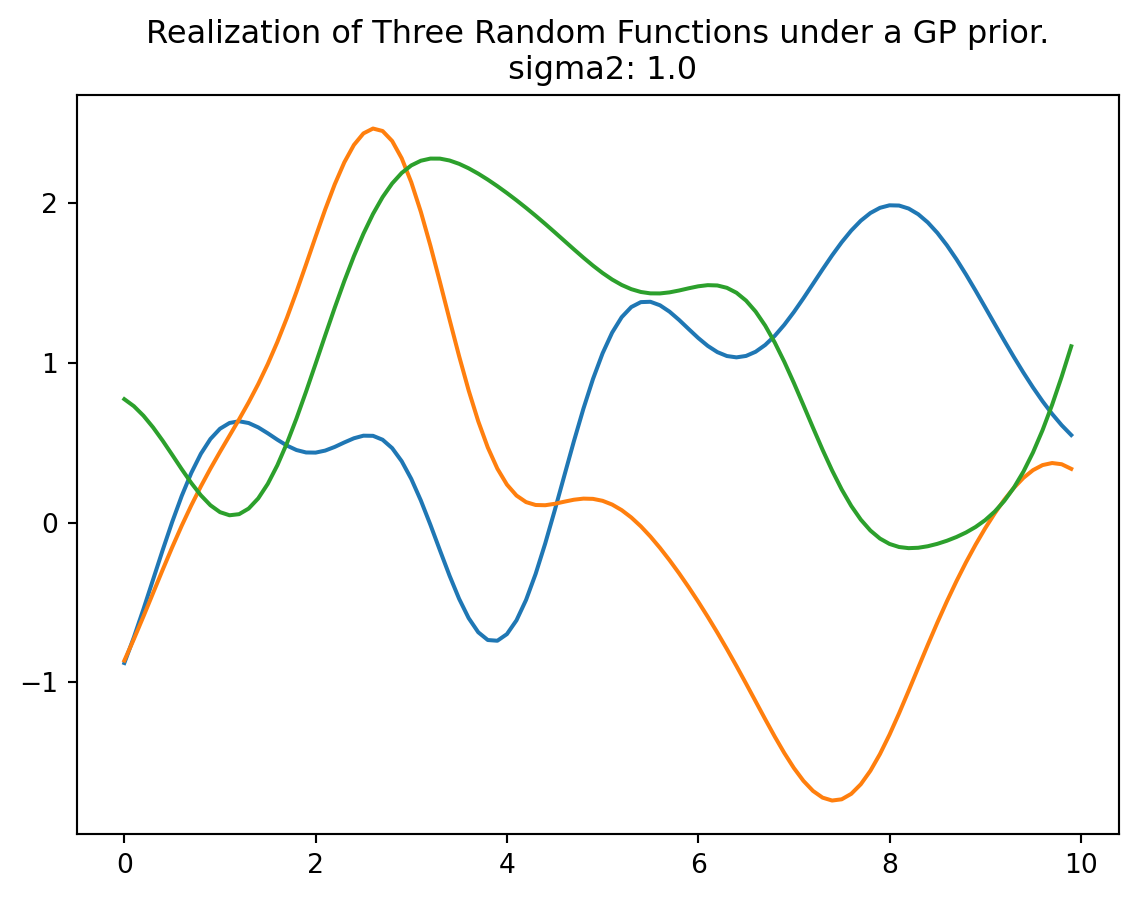

In [52]:
#| label: fig-mvn1-3
#| fig-cap: 'Realization of three random functions under a GP prior. sigma2: 1.0'
rng = np.random.default_rng(seed=12345)
Y = rng.multivariate_normal(zeros(Sigma.shape[0]), Sigma, size = 3, check_valid="raise")
plt.plot(X, Y.T)
plt.title("Realization of Three Random Functions under a GP prior.\n sigma2: {}".format(sigma2[0]))
plt.show()

### Properties of the 1d Example

#### Several Bumps:
In this analysis, we observe several bumps in the $x$-range of $[0,10]$.
These bumps in the function occur because shorter distances exhibit high correlation, while longer distances tend to be essentially uncorrelated. This leads to variations in the function's behavior:

* When $x$ and $x'$ are one $\sigma$ unit apart, the correlation is $\exp\left(-\sigma^2 / (2\sigma^2)\right) = \exp(-1/2) \approx 0.61$, i.e., a relative high correlation.
* $2\sigma$ apart means correlation $\exp(− 2^2 /2) \approx 0.14$, i.e., only small correlation.
* $4\sigma$ apart means correlation $\exp(− 4^2 /2) \approx 0.0003$, i.e., nearly no correlation---variables are considered independent for almost all practical application.


#### Smoothness:
The function plotted in @fig-mvn1-1 represents only a finite realization, which means that we have data for a limited number of pairs, specifically 100 points. These points appear smooth in a tactile sense because they are closely spaced, and the plot function connects the dots with lines to create the appearance of smoothness. The complete surface, which can be conceptually extended to an infinite realization over a compact domain, is exceptionally smooth in a calculus sense due to the covariance function's property of being infinitely differentiable.

#### Scale of Two:
Regarding the scale of the $Y$ values, they have a range of approximately $[-2,2]$, with a 95% probability of falling within this range. In standard statistical terms, 95% of the data points typically fall within two standard deviations of the mean, which is a common measure of the spread or range of data.


In [53]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.random import multivariate_normal

def build_Sigma(X, sigma2):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = 1/(2*sigma2[l])*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)

def plot_mvn( a=0, b=10, sigma2=1.0, size=1, n=100, show=True):    
    X = np.linspace(a, b, n, endpoint=False).reshape(-1,1)
    sigma2 = np.array([sigma2])
    Sigma = build_Sigma(X, sigma2)
    rng = np.random.default_rng(seed=12345)
    Y = rng.multivariate_normal(zeros(Sigma.shape[0]), Sigma, size = size, check_valid="raise")
    plt.plot(X, Y.T)
    plt.title("Realization of Random Functions under a GP prior.\n sigma2: {}".format(sigma2[0]))
    if show:
        plt.show()

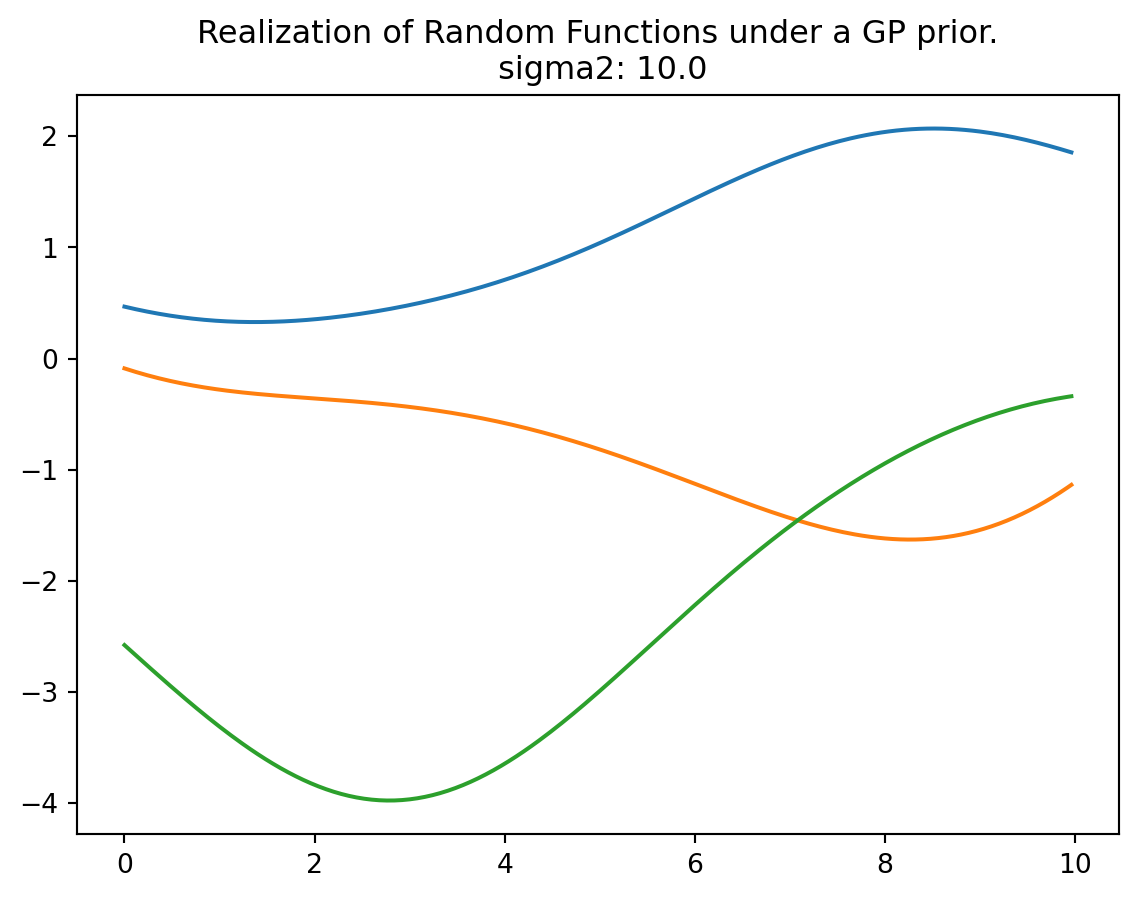

In [54]:
#| label: fig-mvn2
#| fig-cap: 'Realization of Random Functions under a GP prior. sigma2: 10'
plot_mvn(a=0, b=10, sigma2=10.0, size=3, n=250)

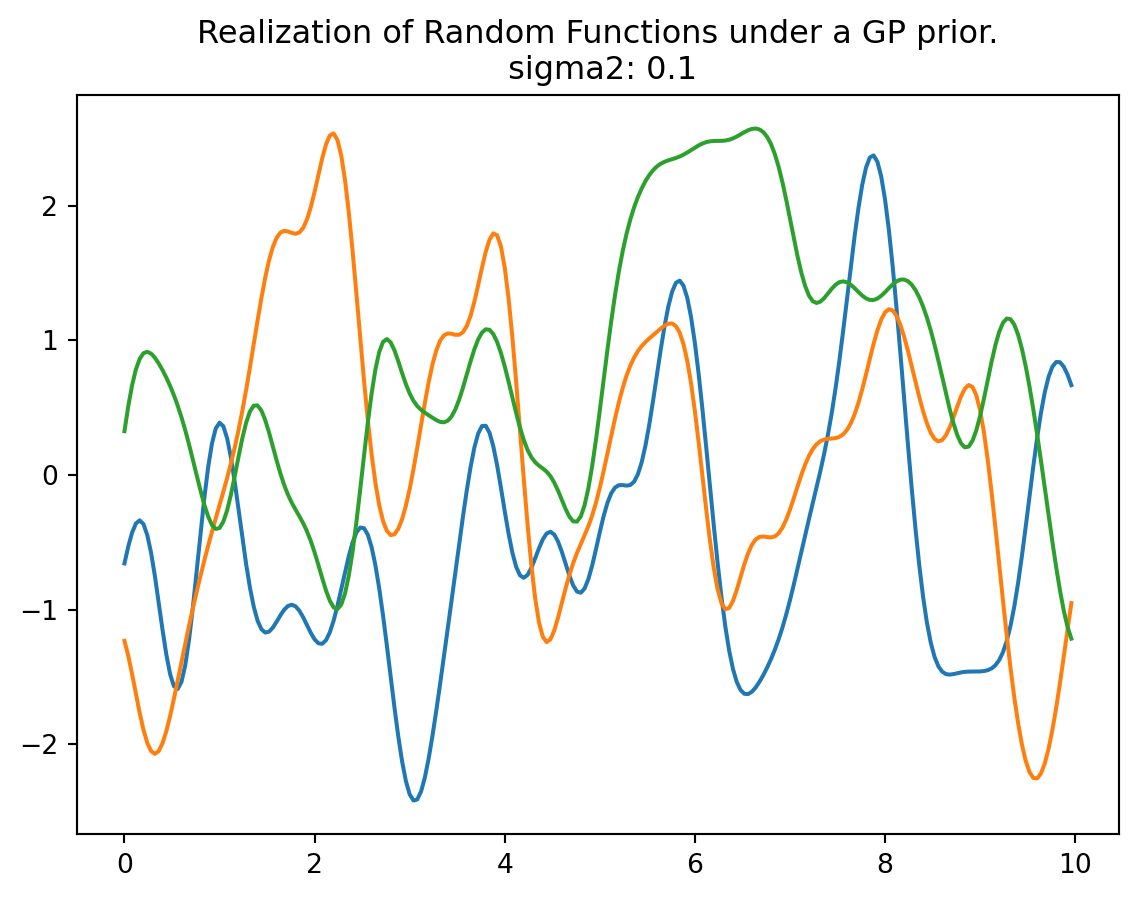

In [55]:
#| label: fig-mvn5
#| fig-cap: 'Realization of Random Functions under a GP prior. sigma2: 0.1'
plot_mvn(a=0, b=10, sigma2=0.1, size=3, n=250)

## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this lecture is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/006_num_gp.ipynb)

:::




<!-- 


In [56]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1], [2]])
nat_y = np.array([5, 10])
n=2
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False, theta_init_zero=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
S.initialize_matrices()
S.build_Psi()
S.build_U()
S.likelihood()
# assert S.mu is close to 7.5 with a tolerance of 1e-6
assert np.allclose(S.mu, 7.5, atol=1e-6)
E = np.exp(1)
sigma2 = E/(E**2 -1) * (25/4 + 25/4*E)
# asssert S.SigmaSqr is close to sigma2 with a tolerance of 1e-6
assert np.allclose(S.SigmaSqr, sigma2, atol=1e-6)

-->





<!-- 

## Exercises

### 1 Number of Sample Points

* The example uses $n=8$ sample points to fit the sin function.
  * What happens, if less than 8 samples are available?

### 2 Modified $\theta$ values

* The example uses a $\theta$ value of $1.0$.
  * What happens if $\theta$ is modified?
  * Can get better predictions with smaller or larger $\theta$ values?

### 3 Prediction Interval

* The prediction interval was identical to the measurement interval, i.e., in the range from $0$ to $2\pi$. This is referred to as "interpolation".
  * What happens if this interval is increased (which is referred to as "extrapolation")?



### Exercise RBF


#### Package Loading


In [57]:
%matplotlib inline
import numpy as np
from numpy.matlib import eye
import scipy.linalg
from numpy import linalg as LA
from spotpython.design.spacefilling import SpaceFilling
from spotpython.fun.objectivefunctions import analytical
import matplotlib.pyplot as plt

#### Define a small number


In [58]:
eps = np.sqrt(np.spacing(1))

#### The Sampling Plan (X)

* We will use 256 points.
* The first 10 points are shown below.


In [59]:
gen = SpaceFilling(2)
rng = np.random.RandomState(1)
lower = np.array([-1,-1])
upper = np.array([2,2])
X = gen.scipy_lhd(256, lower=lower, upper = upper)
X[1:10]

array([[ 0.67319891, -0.11153561],
       [ 0.4979386 , -0.10717298],
       [-0.9991017 ,  1.66863389],
       [-0.423669  , -0.97527218],
       [-0.57241762,  1.77447307],
       [ 1.34580967,  0.62640122],
       [ 0.18662343,  0.18793039],
       [ 1.7664757 ,  1.65743858],
       [ 0.98282275,  0.42361525]])

#### The Objective Function

* Here we use $\sum_{i=1}^n (x_i-1)^2$.
* `f_map()` is a helper function that maps $f$ to the entries (points) in the matrix $X$.


In [60]:
def f(x):
    return np.sum((x-1.0)**2)

def f_map(x):
    return np.array(list(map(f, x)))

In [61]:
y = f_map(X)
y[1:10]

array([1.34231036, 1.47789766, 4.44347889, 5.9285336 , 3.07230572,
       0.25916038, 1.32103849, 1.01971047, 0.33251443])

* Alternatively, we can use pre-defined functions from the `pyspot` package:


In [62]:
# fun = analytical(sigma=0).fun_branin
# fun = analytical(sigma=0).fun_sphere

In [63]:
XX, YY = np.meshgrid(np.linspace(-1, 2, 128), np.linspace(-1, 2, 128))
zz = np.array([f_map(np.array([xi, yi]).reshape(-1,2)) for xi, yi in zip(np.ravel(XX), np.ravel(YY))]).reshape(128,128)

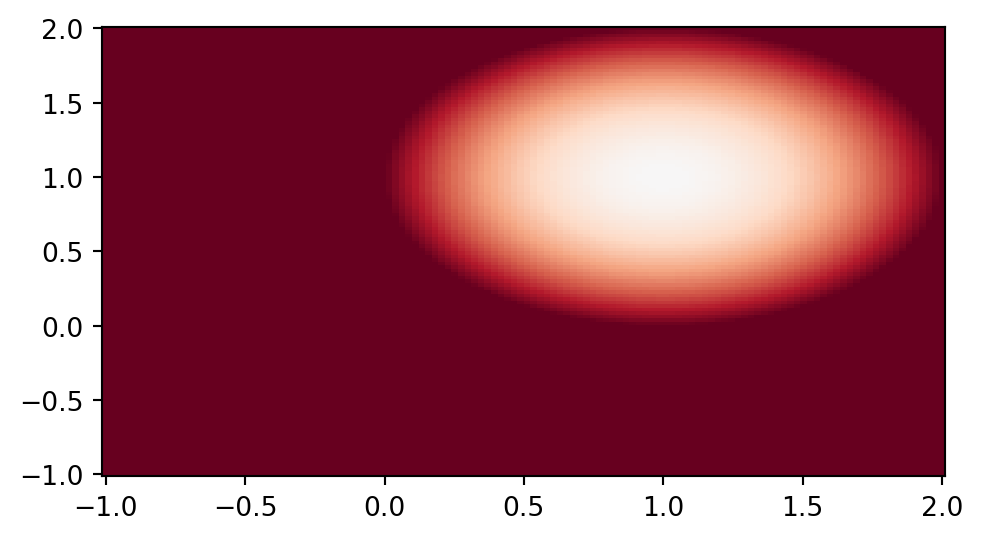

In [64]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
co = ax.pcolormesh(XX, YY, zz, vmin=-1, vmax=1, cmap='RdBu_r')

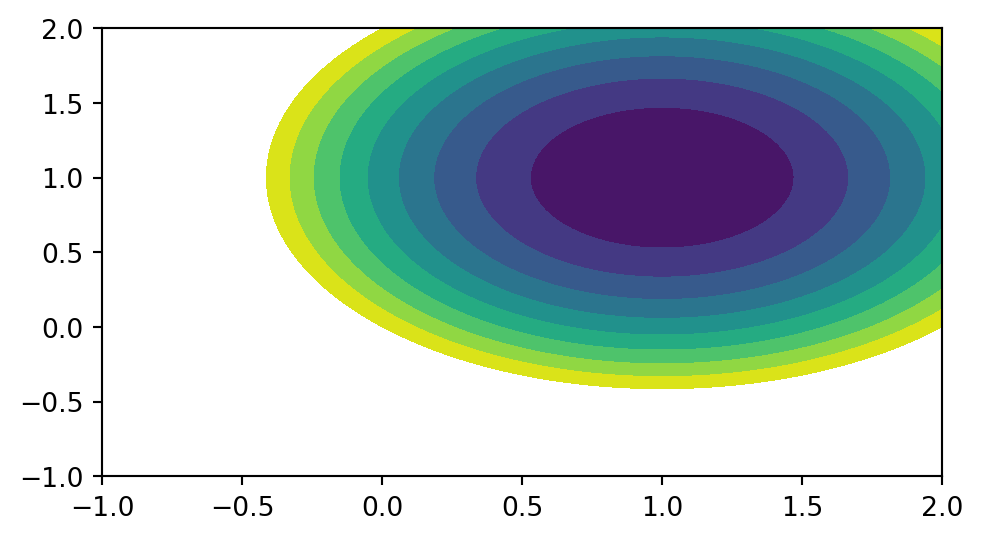

In [65]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
co = ax.contourf(XX, YY, zz, levels=np.linspace(0,2, 10))

#### The Gram Matrix


In [66]:
def build_Gram(X):
        """
        Construction of the Gram matrix.
        """
        n = X.shape[0]
        G = np.zeros((n, n))
        for i in range(n):
            for j in range(i, n):
                G[i, j] = np.linalg.norm(X[i] - X[j])
        G = G + G.T    
        return G

In [67]:
G = build_Gram(X)
np.round(G,2)

array([[0.  , 0.51, 0.57, ..., 0.99, 0.62, 1.39],
       [0.51, 0.  , 0.18, ..., 0.91, 0.94, 1.41],
       [0.57, 0.18, 0.  , ..., 0.75, 0.87, 1.26],
       ...,
       [0.99, 0.91, 0.75, ..., 0.  , 0.71, 0.52],
       [0.62, 0.94, 0.87, ..., 0.71, 0.  , 0.91],
       [1.39, 1.41, 1.26, ..., 0.52, 0.91, 0.  ]])

#### The Radial Basis Functions


In [68]:
def basis_linear(r):
    return r*r*r

In [69]:
def basis_gauss(r, sigma = 1e-1):
    return np.exp(-r**2/sigma)

+ We select the Gaussian basis function for the following examples:


In [70]:
basis = basis_gauss

#### The $\Psi$ Matrix


In [71]:
def build_Phi(G, basis, eps=np.sqrt(np.spacing(1))):
    n = G.shape[0]
    Phi = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Phi[i,j] = basis(G[i,j])
    Phi = Phi +  np.multiply(np.mat(eye(n)), eps)
    return Phi

In [72]:
Phi = build_Phi(G, basis=basis)
Phi[0:3,0:3]

matrix([[1.00000001, 0.07413611, 0.03828587],
        [0.07413611, 1.00000001, 0.73539165],
        [0.03828587, 0.73539165, 1.00000001]])

#### Inverting $\Psi$ via Cholesky Factorization

* There a two different implementations of the Cholesky factorization oin Python:
  * `numpy`'s  `linalg.cholesky()` and
  * `scipy`'s  `linalg.cholesky()`
* We will use `numpy`'s version.


In [73]:
def get_rbf_weights(Phi, y):
    """ 
    Calculating the weights of the radial basis function surrogate.
    Cholesky factorization used.
    LU decomposition otherwise (not implemented yet).
    """
    # U = scipy.linalg.cholesky(Phi, lower=True)
    U = np.linalg.cholesky(Phi)
    U = U.T
    # w = U\(U'\ModelInfo.y)
    w = np.linalg.solve(U, np.linalg.solve(U.T, y))
    return w

In [74]:
w = get_rbf_weights(Phi, y)
w[0:3]

array([-6.98432952,  3.06393352, -5.13738971])

#### Predictions

##### The Predictor


In [75]:
def pred_rbf(x, X, basis, w):
    n = X.shape[0]
    d = np.zeros((n))
    phi = np.zeros((n))
    for i in range(n):
        d[i] = np.linalg.norm(x - X[i])
    for i in range(n):
        phi[i] = basis(d[i])
    return w @ phi    

##### Testing some Example Points


In [76]:
x = X[0]
x

array([ 0.76153494, -0.61391197])

##### The RBF Prediction $\hat{f}$


In [77]:
pred_rbf(x=x, X=X, basis=basis, w=w)

2.6615775203204652

##### The Original (True) Value $f$


In [78]:
f_map(np.array(x).reshape(1,-1))

array([2.66157742])

##### Visualizations


In [79]:
XX, YY = np.meshgrid(np.linspace(-1, 2, 128), np.linspace(-1, 2, 128))
zz = np.array([pred_rbf(x=np.array([xi, yi]), X=X, basis=basis,w=w) for xi, yi in zip(np.ravel(XX), np.ravel(YY))]).reshape(128,128)

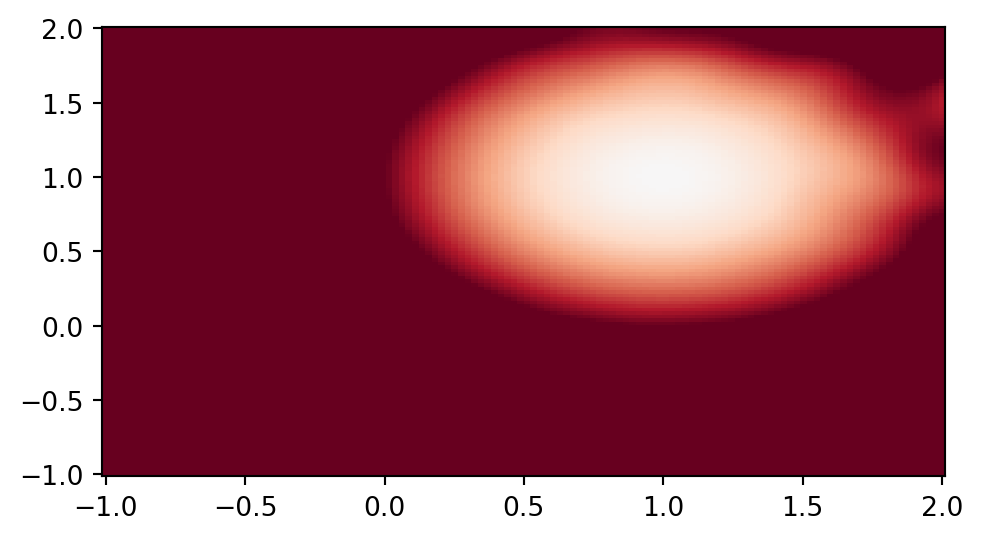

In [80]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
co = ax.pcolormesh(XX, YY, zz, vmin=-1, vmax=1, cmap='RdBu_r')

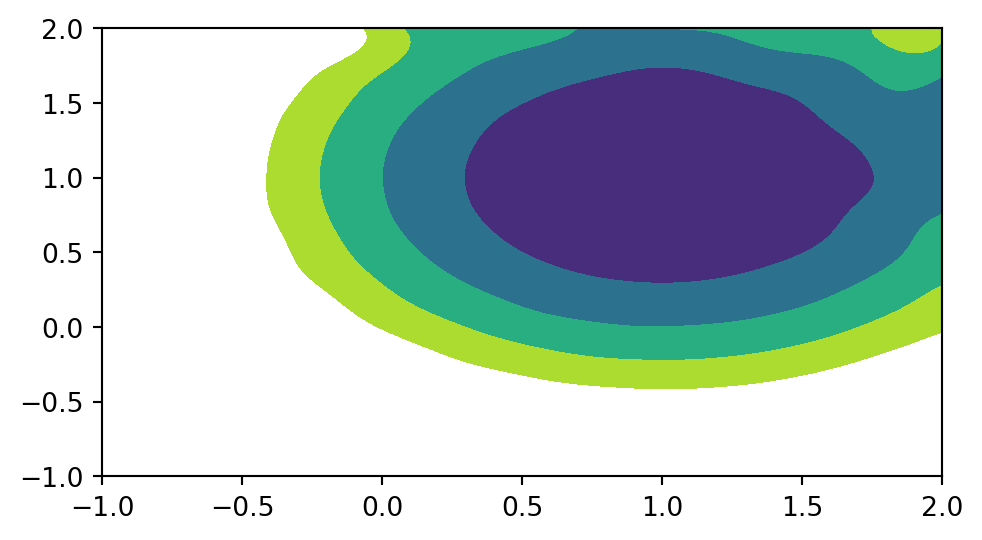

In [81]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
co = ax.contourf(XX, YY, zz, levels=np.linspace(0,2, 5))

##### Note

The original function $f$ is cheaper than the surrogate $\hat{f}$ in this example, because we have chosen a simple analytical function as the ground truth. This is not the case in real-world settings.

#### Cholesky Factorization

##### $A = U^T U$

* $U$ is an upper triangular matrix


In [82]:
def cholesky_U(A):
    N = A.shape[0]
    U = np.zeros((N,N))
    for k in range(0,N):
         # compute diagonal entry
         U[k,k] = A[k,k]
         for j in range(0,k):
             U[k,k] = U[k,k] - U[j,k]*U[j,k]
         U[k,k] = np.sqrt(U[k,k])
         # compute remaining column
         for i in range(k+1,N):
             U[k,i] = A[k,i]
             for j in range(0,k):
                 U[k,i] = U[k,i] - U[j,i]*U[j,k]
             U[k,i] = U[k,i] / U[k,k]
    return U

#### $A = L L^T$

$L$ is a lower triangular matrix


In [83]:
def cholesky_L(A):
    N = A.shape[0]
    L = np.zeros((N,N))
    for k in range(0,N):
         # compute diagonal entry
         L[k,k] = A[k,k]
         for j in range(0,k):
             L[k,k] = L[k,k] - L[k,j]*L[k,j]
         L[k,k] = np.sqrt(L[k,k])
         # compute remaining column
         for i in range(k+1,N):
             L[i,k] = A[i,k]
             for j in range(0,k):
                 L[i,k] = L[i,k] - L[i,j]*L[k,j]
             L[i,k] = L[i,k] / L[k,k]
    return L

#### Example


In [84]:
A = np.array([[4, 2, 4, 4], [2, 10, 5, 2], [4, 5, 9, 6], [4, 2, 6, 9]])
A

array([[ 4,  2,  4,  4],
       [ 2, 10,  5,  2],
       [ 4,  5,  9,  6],
       [ 4,  2,  6,  9]])

#### Check: Is $A$ positive definite?


In [85]:
assert(np.all(np.linalg.eigvals(A) > 0))

####  $A = U^T U$

Perform Cholesky Factorization


In [86]:
U = cholesky_U(A)
U

array([[2., 1., 2., 2.],
       [0., 3., 1., 0.],
       [0., 0., 2., 1.],
       [0., 0., 0., 2.]])

Test Result


In [87]:
U.T @ U

array([[ 4.,  2.,  4.,  4.],
       [ 2., 10.,  5.,  2.],
       [ 4.,  5.,  9.,  6.],
       [ 4.,  2.,  6.,  9.]])

####  $A = L L^T$


In [88]:
L = cholesky_L(A)
L

array([[2., 0., 0., 0.],
       [1., 3., 0., 0.],
       [2., 1., 2., 0.],
       [2., 0., 1., 2.]])

Test Result


In [89]:
L @ L.T

array([[ 4.,  2.,  4.,  4.],
       [ 2., 10.,  5.,  2.],
       [ 4.,  5.,  9.,  6.],
       [ 4.,  2.,  6.,  9.]])

## Exercises

### Gaussian Basis Function

* Plot the Gaussian Basis Function `basis_gauss` in the range from -2 to 2 using `matplotlib.pyplot`
  * Hint: Check the [matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) for examples.
  * Generate a plot with several `sigma` values, e.g., 0.1, 1.0, and 10.
* What is the meaning of the `sigma` parameter: Can you explain its influence / effect on the model quality?
  * Is the `sigma` value important?

### Linear Basis Function

* Select the linear basis function?
* What errors occur?
* Do you have any ideas how to fix this error? -->